In [1]:
import pandas as pd

# Load dataset
file_path = r"C:\Users\hp\OneDrive\Desktop\soil\soildataset.xlsx - Sheet1.csv"
df = pd.read_csv(file_path)

# Extract Sample Name, Moisture Level, and Reading Number
df[['Sample', 'Moisture', 'Reading']] = df['Records'].str.extract(r'([A-Za-z0-9-]+)_(\d+)ml-(\d+)', expand=True)

# Drop rows where extraction failed (NaN values)
df = df.dropna(subset=['Sample', 'Moisture', 'Reading'])

# Convert columns to numeric types
df['Moisture'] = df['Moisture'].astype(int)
df['Reading'] = df['Reading'].astype(int)

# Drop unnecessary columns
df = df.drop(columns=['Records', 'Reading'])

# Define moisture level categories
def categorize_moisture(moisture):
    if moisture == 0:
        return "Low"
    elif moisture == 25:
        return "Medium"
    elif moisture == 50:
        return "High"
    else :
        return "Not valid"

# Apply categorization
df['Moisture_Level'] = df['Moisture'].apply(categorize_moisture)

# Compute Mean for Each (Sample, Moisture Level Category)
df_grouped = df.groupby(['Sample', 'Moisture_Level']).mean().reset_index()

# Split dataset into three based on moisture levels
df_low = df_grouped[df_grouped['Moisture_Level'] == "Low"]
df_medium = df_grouped[df_grouped['Moisture_Level'] == "Medium"]
df_high = df_grouped[df_grouped['Moisture_Level'] == "High"]

# Save the datasets separately
df_low.to_csv("low_moisture_dataset.csv", index=False)
df_medium.to_csv("medium_moisture_dataset.csv", index=False)
df_high.to_csv("high_moisture_dataset.csv", index=False)

# Print the first few rows of each grouped dataset
print("Low Moisture Dataset:")
print(df_low.head())

print("\nMedium Moisture Dataset:")
print(df_medium.head())

print("\nHigh Moisture Dataset:")
print(df_high.head())



Low Moisture Dataset:
   Sample Moisture_Level       410       435       460       485      510  \
1     100            Low  717.8885  146.2555  366.1325   95.2335  173.960   
4     101            Low  769.9390  163.9080  411.0630  104.7750  204.155   
7     102            Low  722.0850  144.4800  364.9040   92.6160  173.885   
10    104            Low  753.0880  157.7840  385.3090  101.3120  190.075   
13    106            Low  782.4030  165.4350  416.0490  118.4500  240.565   

        535      560      585  ...    940  Capacitity Moist   Temp  Moist  \
1   162.658  26.0825  31.7425  ...  6.772           2644.75  37.15    0.0   
4   182.654  34.4690  41.7680  ...  7.258           2650.30  38.50    0.0   
7   157.396  27.4050  33.1740  ...  6.552           2645.60  37.40    0.0   
10  172.621  31.2350  37.6770  ...  6.992           2645.60  38.30    0.0   
13  194.867  26.4470  29.8600  ...  7.080           2627.10  35.50    0.0   

    EC (u/10 gram)     Ph  Nitro (mg/10 g)  Posh Nit


🔹 **Correlation for Ph (Grouped by Output)**



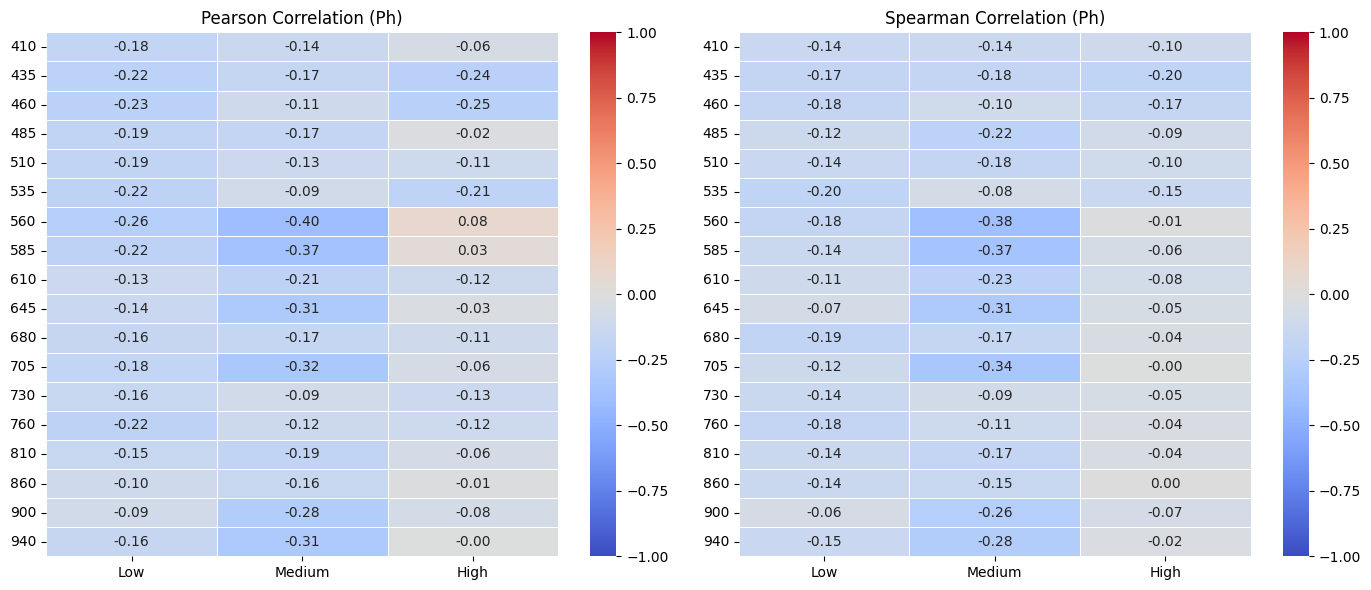


🔹 **Correlation for Nitro (mg/10 g) (Grouped by Output)**



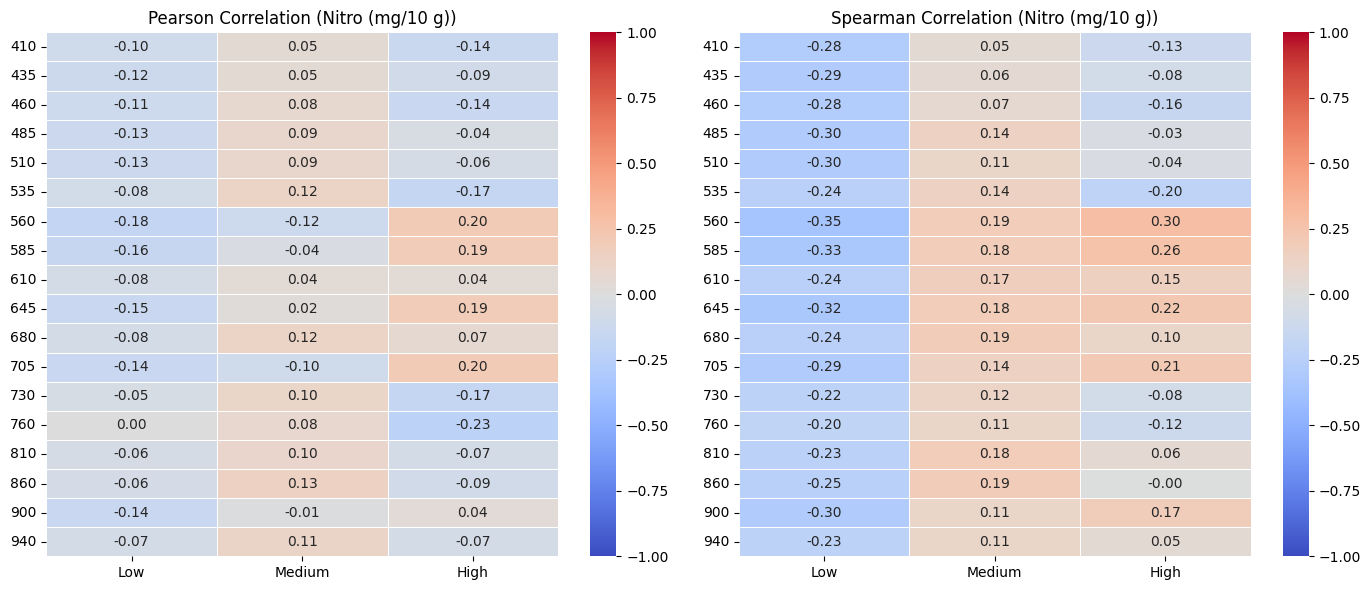


🔹 **Correlation for Posh Nitro (mg/10 g) (Grouped by Output)**



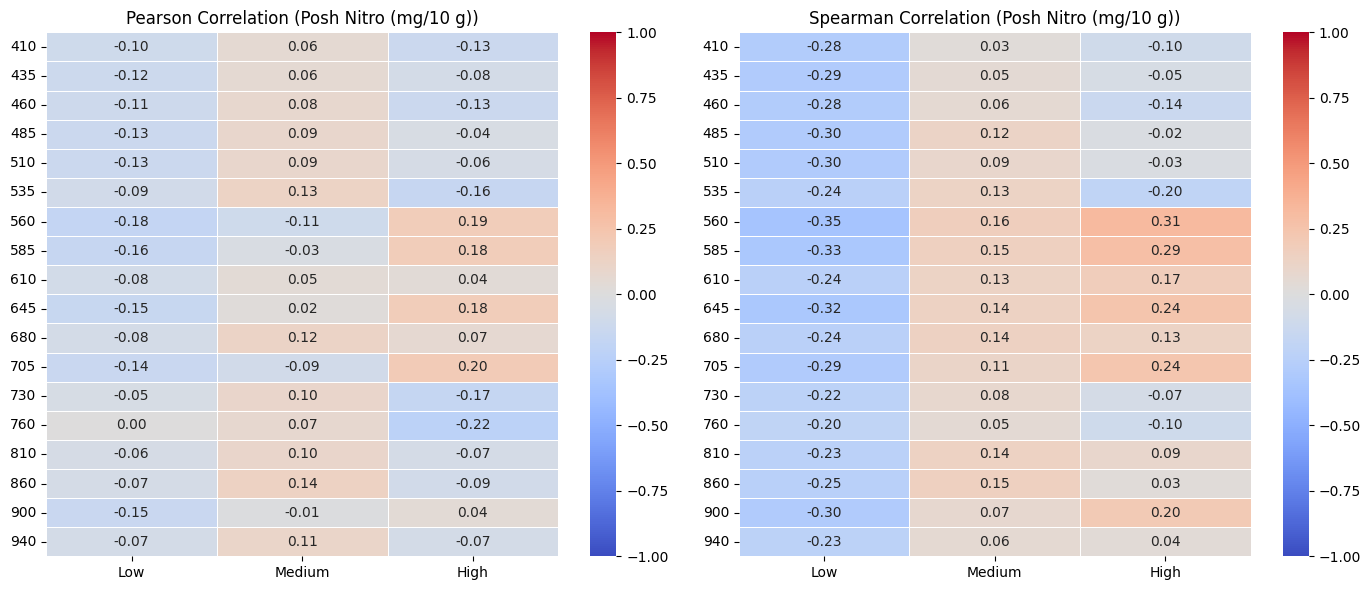


🔹 **Correlation for Pota Nitro (mg/10 g) (Grouped by Output)**



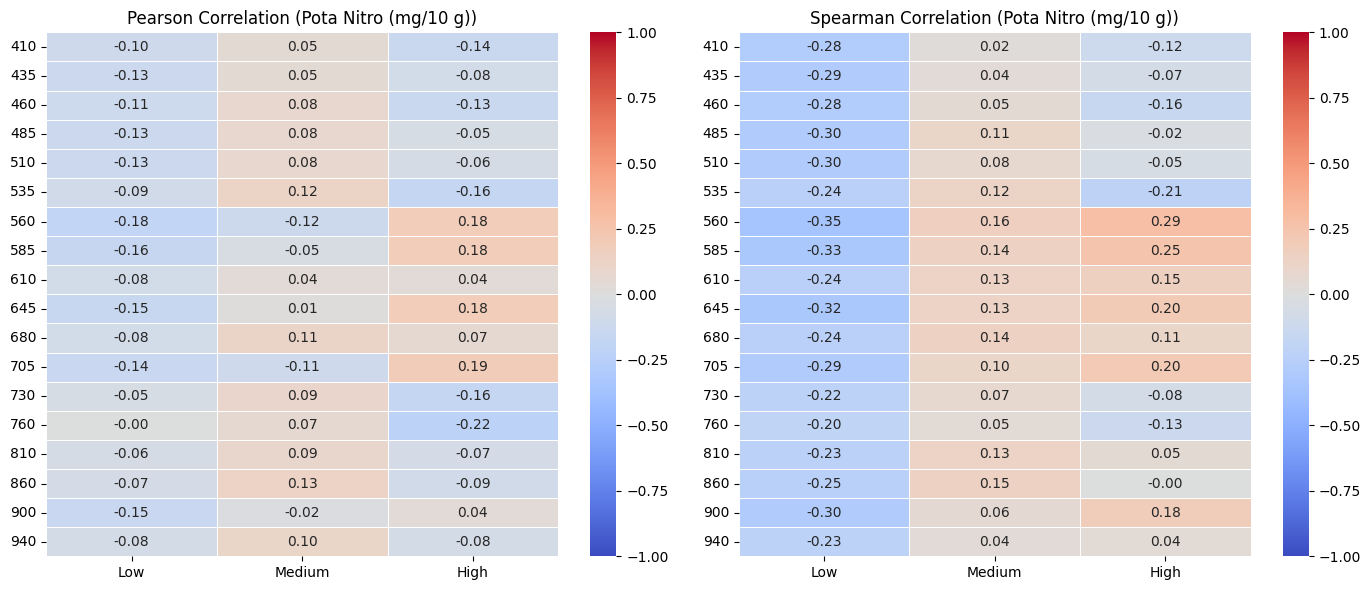

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Function to compute and plot correlation matrices grouped by Output (Soil Properties)
def plot_correlation_by_output(df_low, df_medium, df_high, vmin=-1, vmax=1):
    moisture_levels = {"Low": df_low, "Medium": df_medium, "High": df_high}
    
    # Iterate through each soil property (output)
    for prop in soil_properties:
        print(f"\n🔹 **Correlation for {prop} (Grouped by Output)**\n")
        
        # Create a DataFrame to store Pearson & Spearman correlations across moisture levels
        pearson_df = pd.DataFrame(index=wavelengths)
        spearman_df = pd.DataFrame(index=wavelengths)

        for level, df in moisture_levels.items():
            subset = df[wavelengths + [prop]].dropna()  # Select relevant columns & drop NaNs
            
            if subset.empty:
                print(f"No valid data for {level} Moisture Level.")
                continue
            
            # Compute Pearson & Spearman correlation
            pearson_corr = subset.corr(method="pearson")
            spearman_corr = subset.corr(method="spearman")

            # Store correlations for the given soil property
            pearson_df[level] = pearson_corr.loc[wavelengths, prop]
            spearman_df[level] = spearman_corr.loc[wavelengths, prop]
        # Plot heatmaps side by side (for Pearson & Spearman)
        fig, axes = plt.subplots(1, 2, figsize=(14, 6))

        sns.heatmap(
            pearson_df, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5,
            vmin=vmin, vmax=vmax, ax=axes[0]
        )
        axes[0].set_title(f"Pearson Correlation ({prop})")

        sns.heatmap(
            spearman_df, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5,
            vmin=vmin, vmax=vmax, ax=axes[1]
        )
        axes[1].set_title(f"Spearman Correlation ({prop})")

        plt.tight_layout()
        plt.show()

# Define column names
wavelengths = ['410', '435', '460', '485', '510', '535', '560', '585', 
               '610', '645', '680', '705', '730', '760', '810', '860', '900', '940']
soil_properties = ['Ph', 'Nitro (mg/10 g)', 'Posh Nitro (mg/10 g)', 'Pota Nitro (mg/10 g)']

# Run the grouped correlation analysis by output
plot_correlation_by_output(df_low, df_medium, df_high)


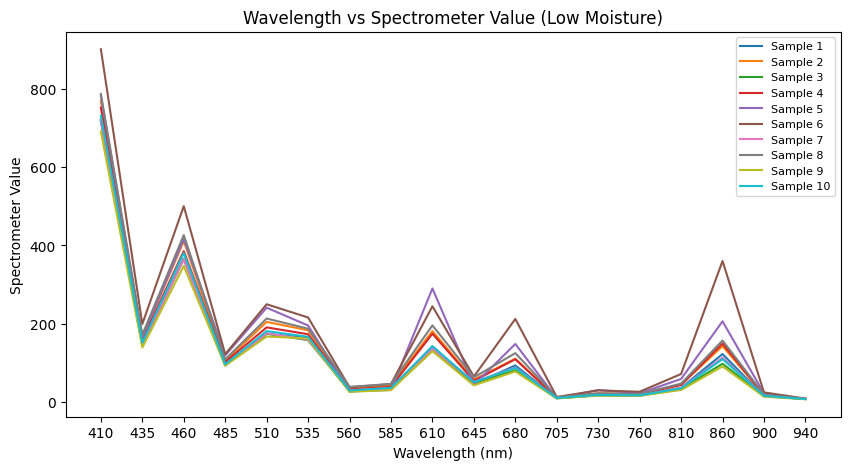

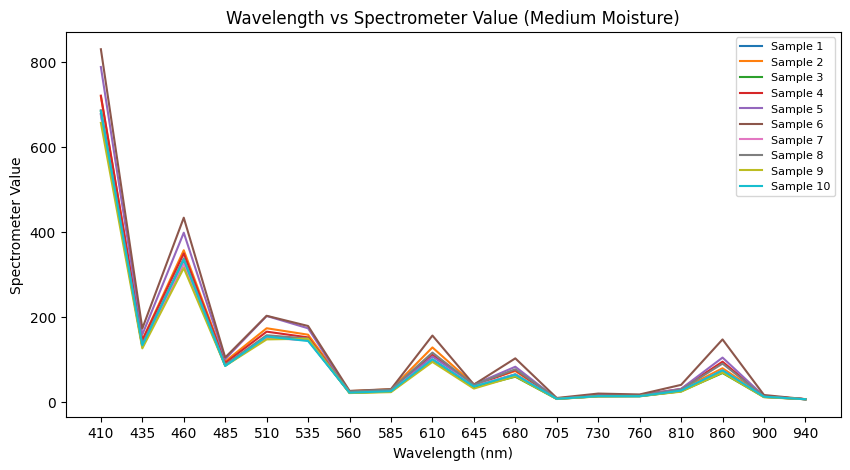

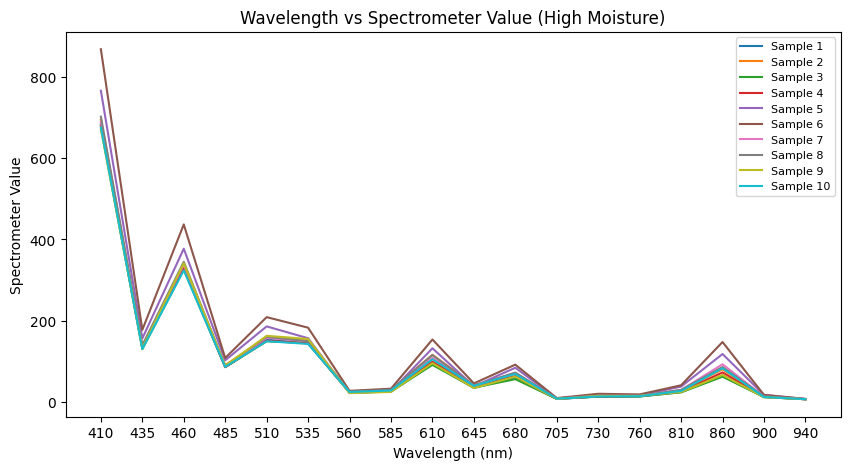

In [4]:
# Function to plot Wavelength vs Spectrometer Value
def plot_wavelength_vs_spectrometer(df, moisture_level):
    plt.figure(figsize=(10, 5))
    for i in range(min(len(df), 10)):  # Limit to 10 samples for better visualization
        plt.plot(wavelengths, df[wavelengths].iloc[i, :], label=f"Sample {i+1}")
    
    plt.xlabel("Wavelength (nm)")
    plt.ylabel("Spectrometer Value")
    plt.title(f"Wavelength vs Spectrometer Value ({moisture_level} Moisture)")
    plt.legend(loc="upper right", fontsize=8)
    plt.show()

# Plot for different moisture levels
plot_wavelength_vs_spectrometer(df_low, "Low")
plot_wavelength_vs_spectrometer(df_medium, "Medium")
plot_wavelength_vs_spectrometer(df_high, "High")

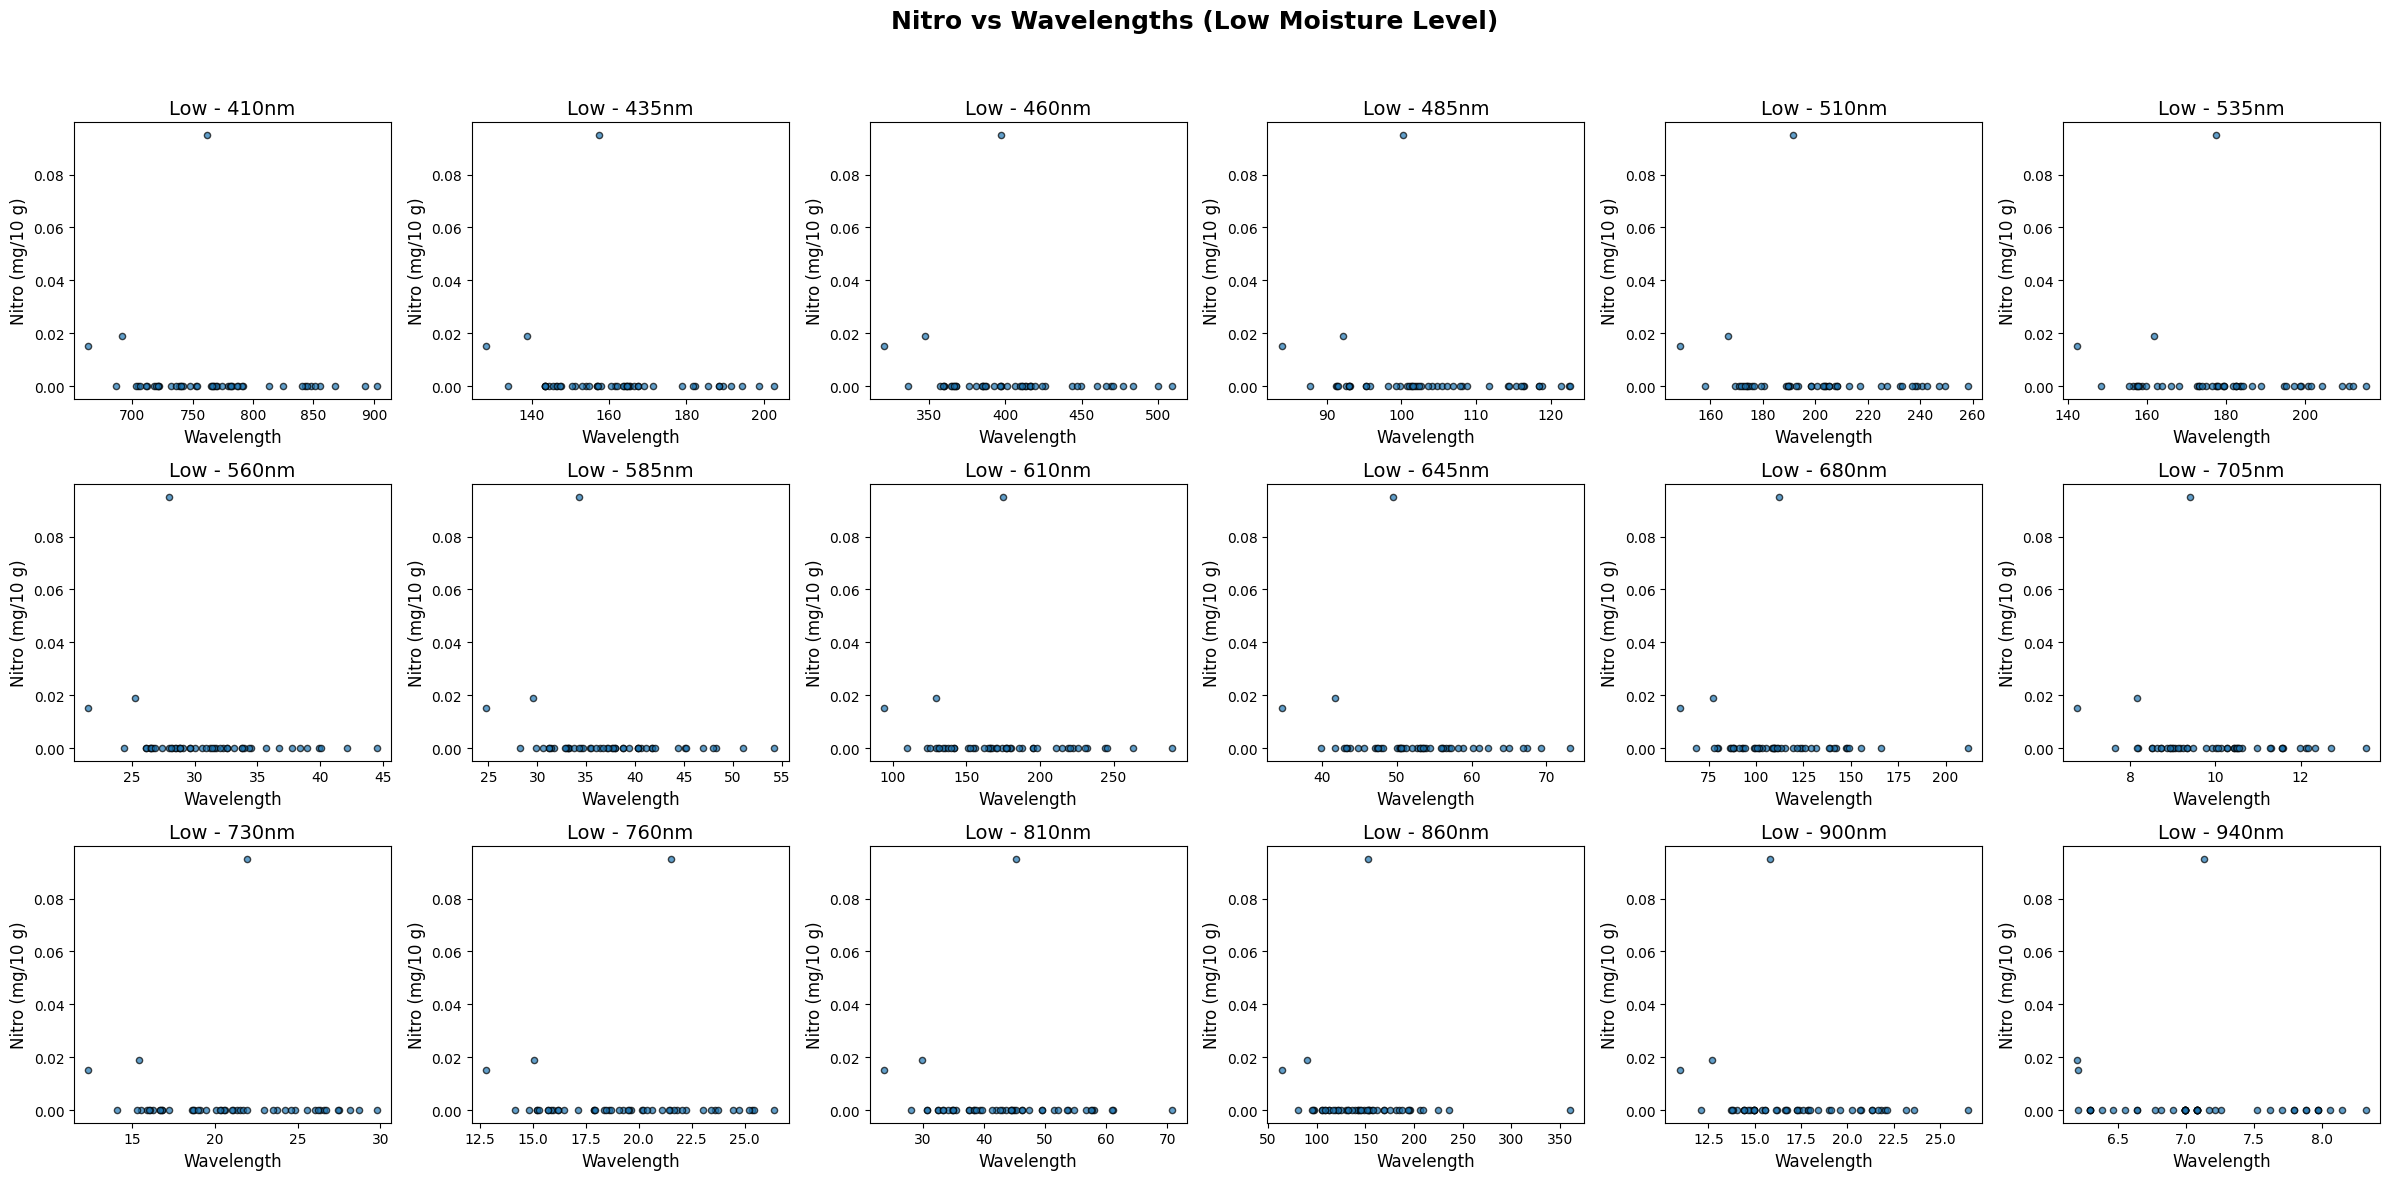

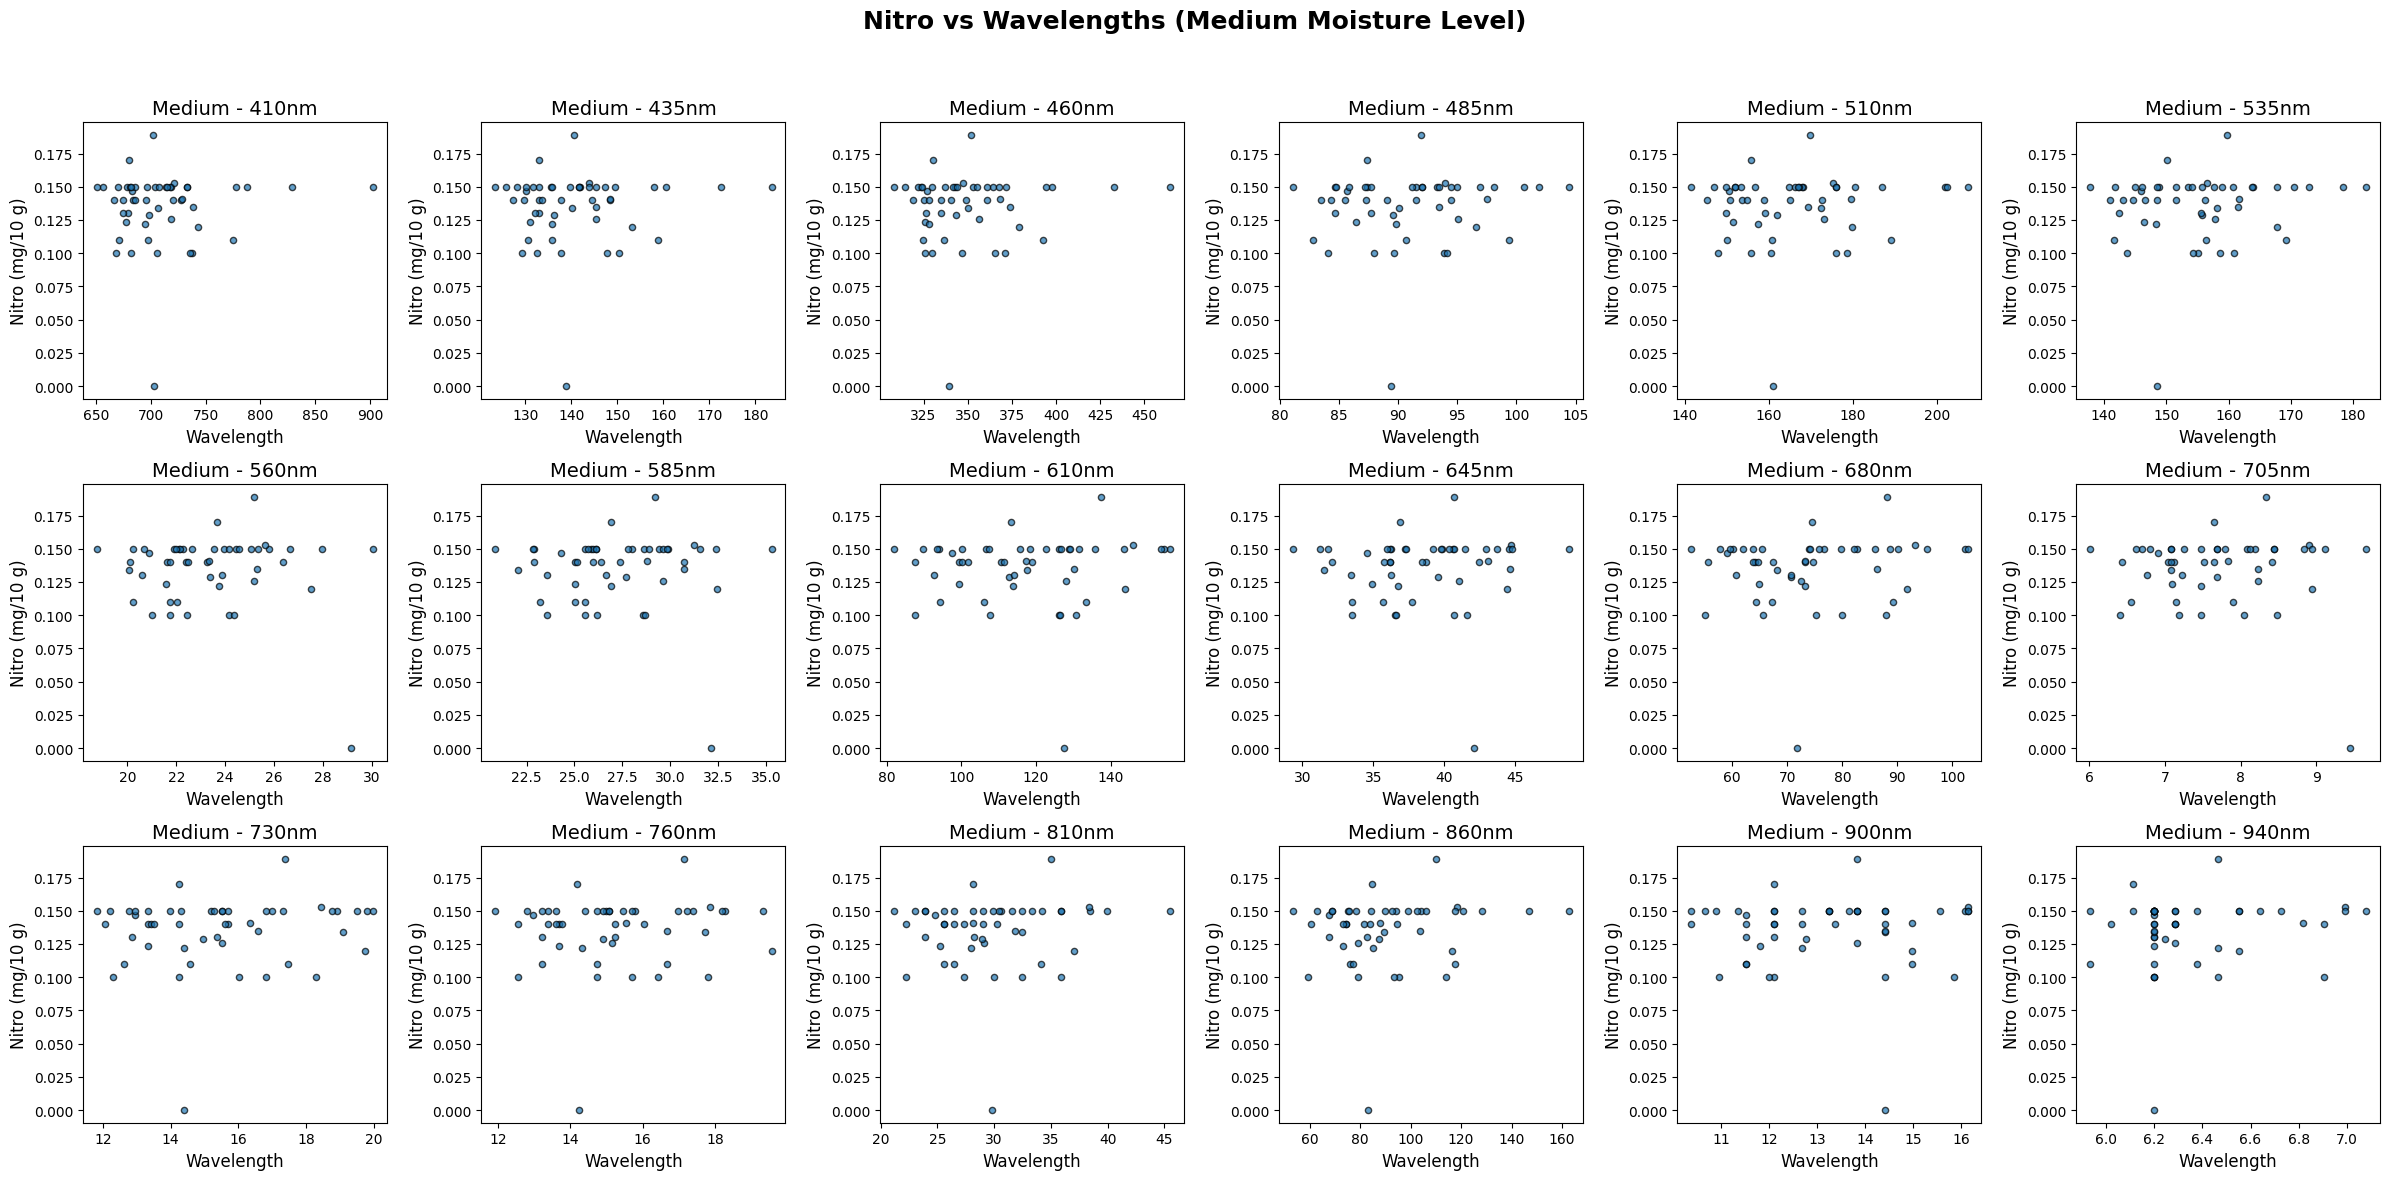

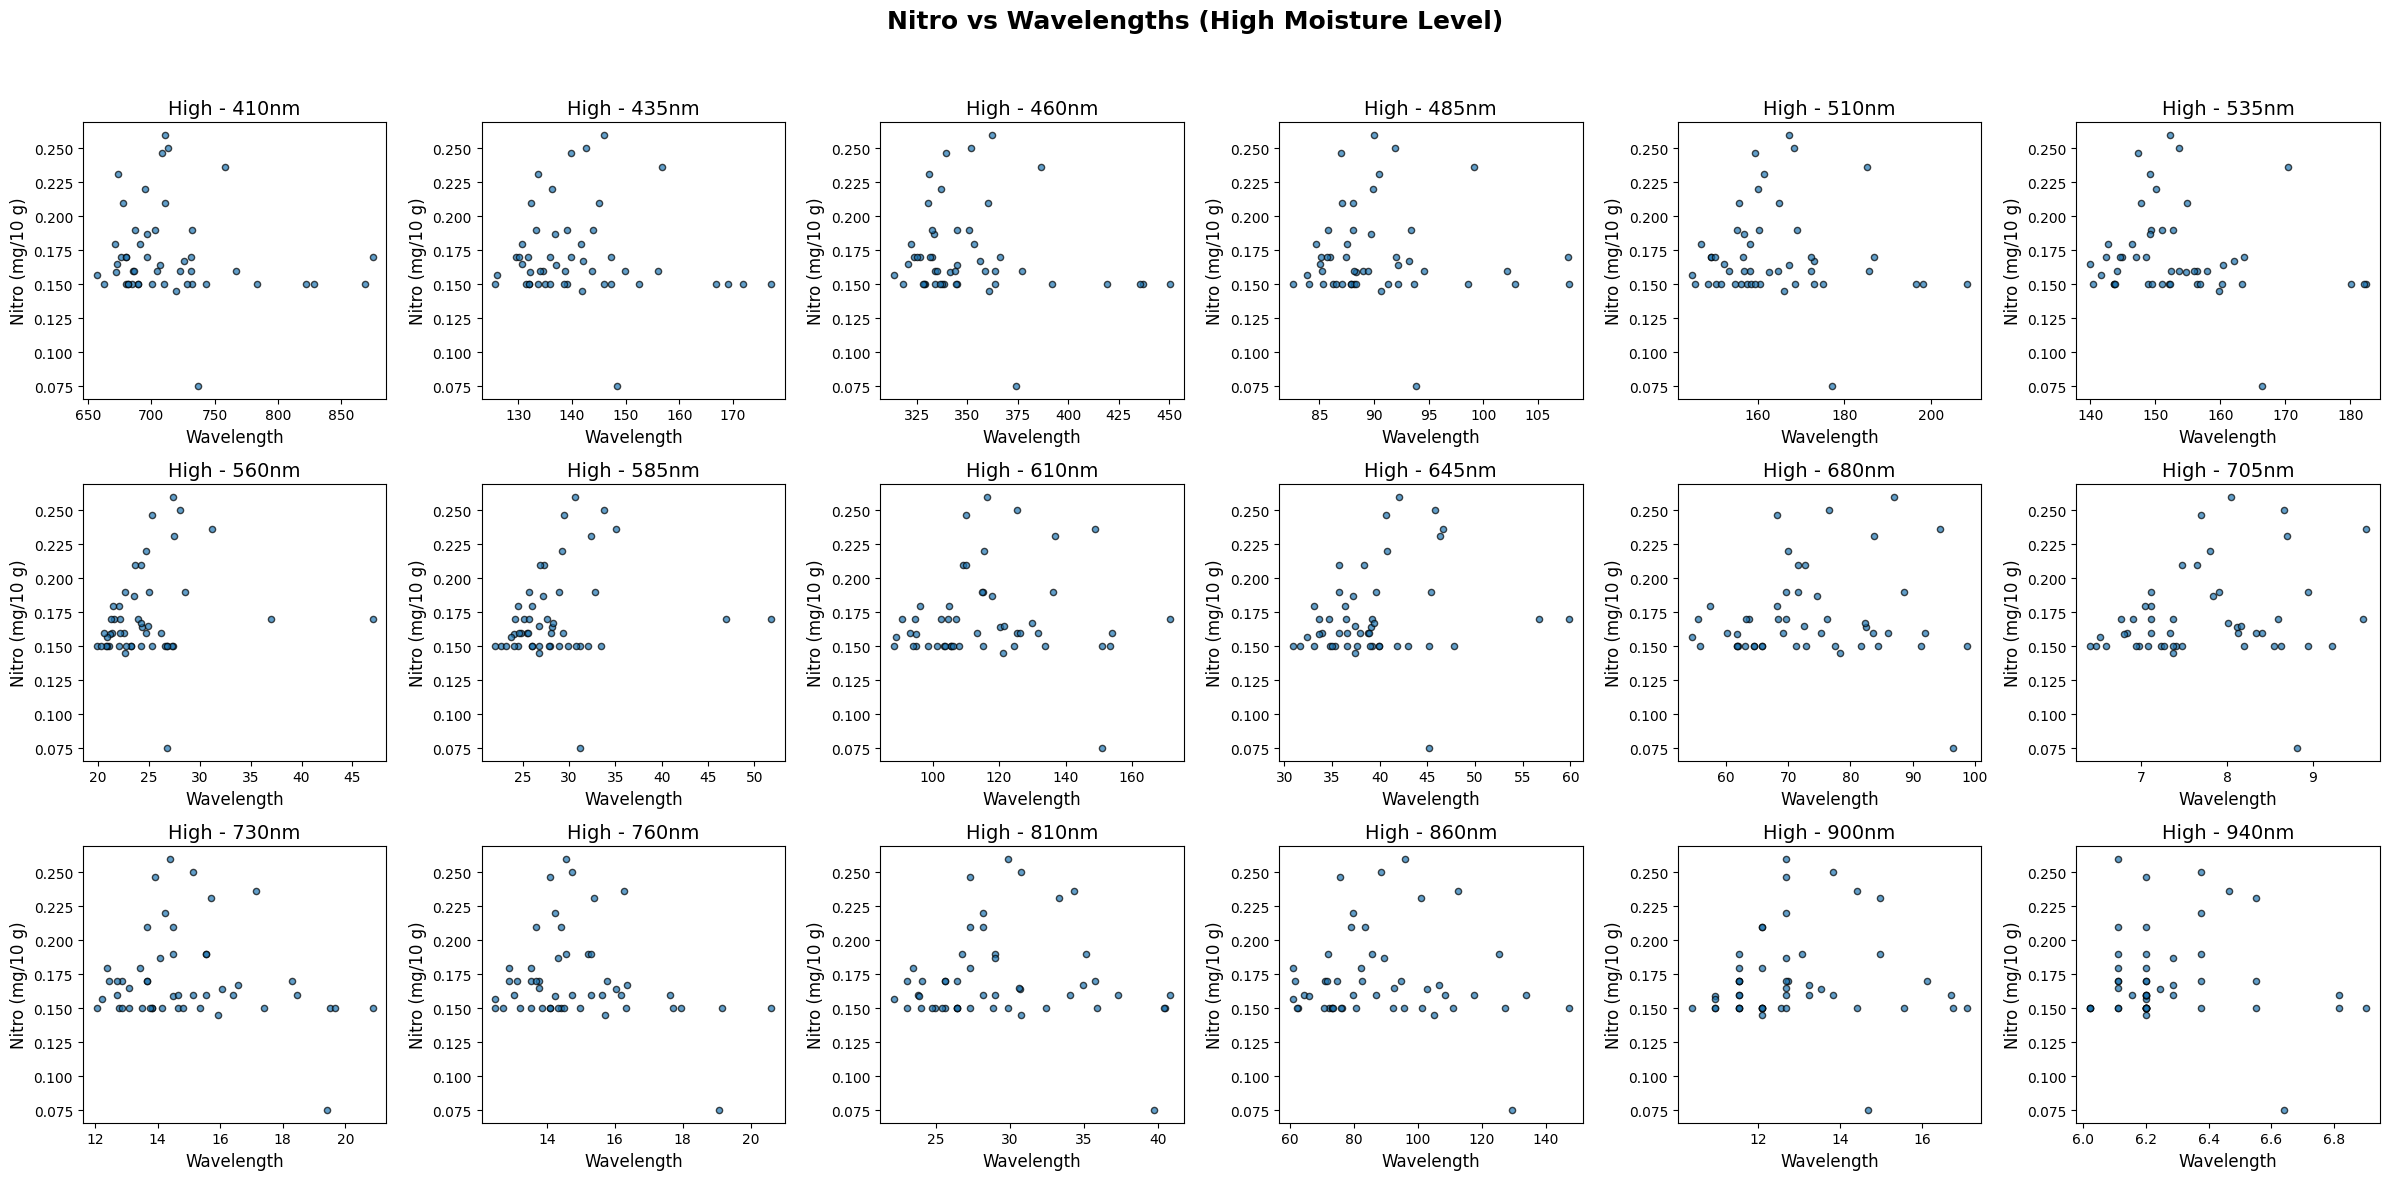

In [3]:
import matplotlib.pyplot as plt

# Function to plot Nitro vs Wavelengths for each Moisture Level
def plot_nitro_vs_wavelengths(df, moisture_level):
    fig, axes = plt.subplots(3, 6, figsize=(24, 12))  # Large figure size (3 rows, 6 columns)
    
    for idx, wavelength in enumerate(wavelengths):
        row, col = divmod(idx, 6)  # Arrange in 3 rows & 6 columns
        ax = axes[row, col]
        
        ax.scatter(df[wavelength], df["Nitro (mg/10 g)"], alpha=0.7, edgecolors='k', s=20)
        ax.set_title(f"{moisture_level} - {wavelength}nm", fontsize=14)
        ax.set_xlabel("Wavelength", fontsize=12)
        ax.set_ylabel("Nitro (mg/10 g)", fontsize=12)
    
    plt.suptitle(f"Nitro vs Wavelengths ({moisture_level} Moisture Level)", fontsize=18, fontweight='bold')
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit title
    plt.show()

# Plot separately for each moisture level
plot_nitro_vs_wavelengths(df_low, "Low")
plot_nitro_vs_wavelengths(df_medium, "Medium")
plot_nitro_vs_wavelengths(df_high, "High")


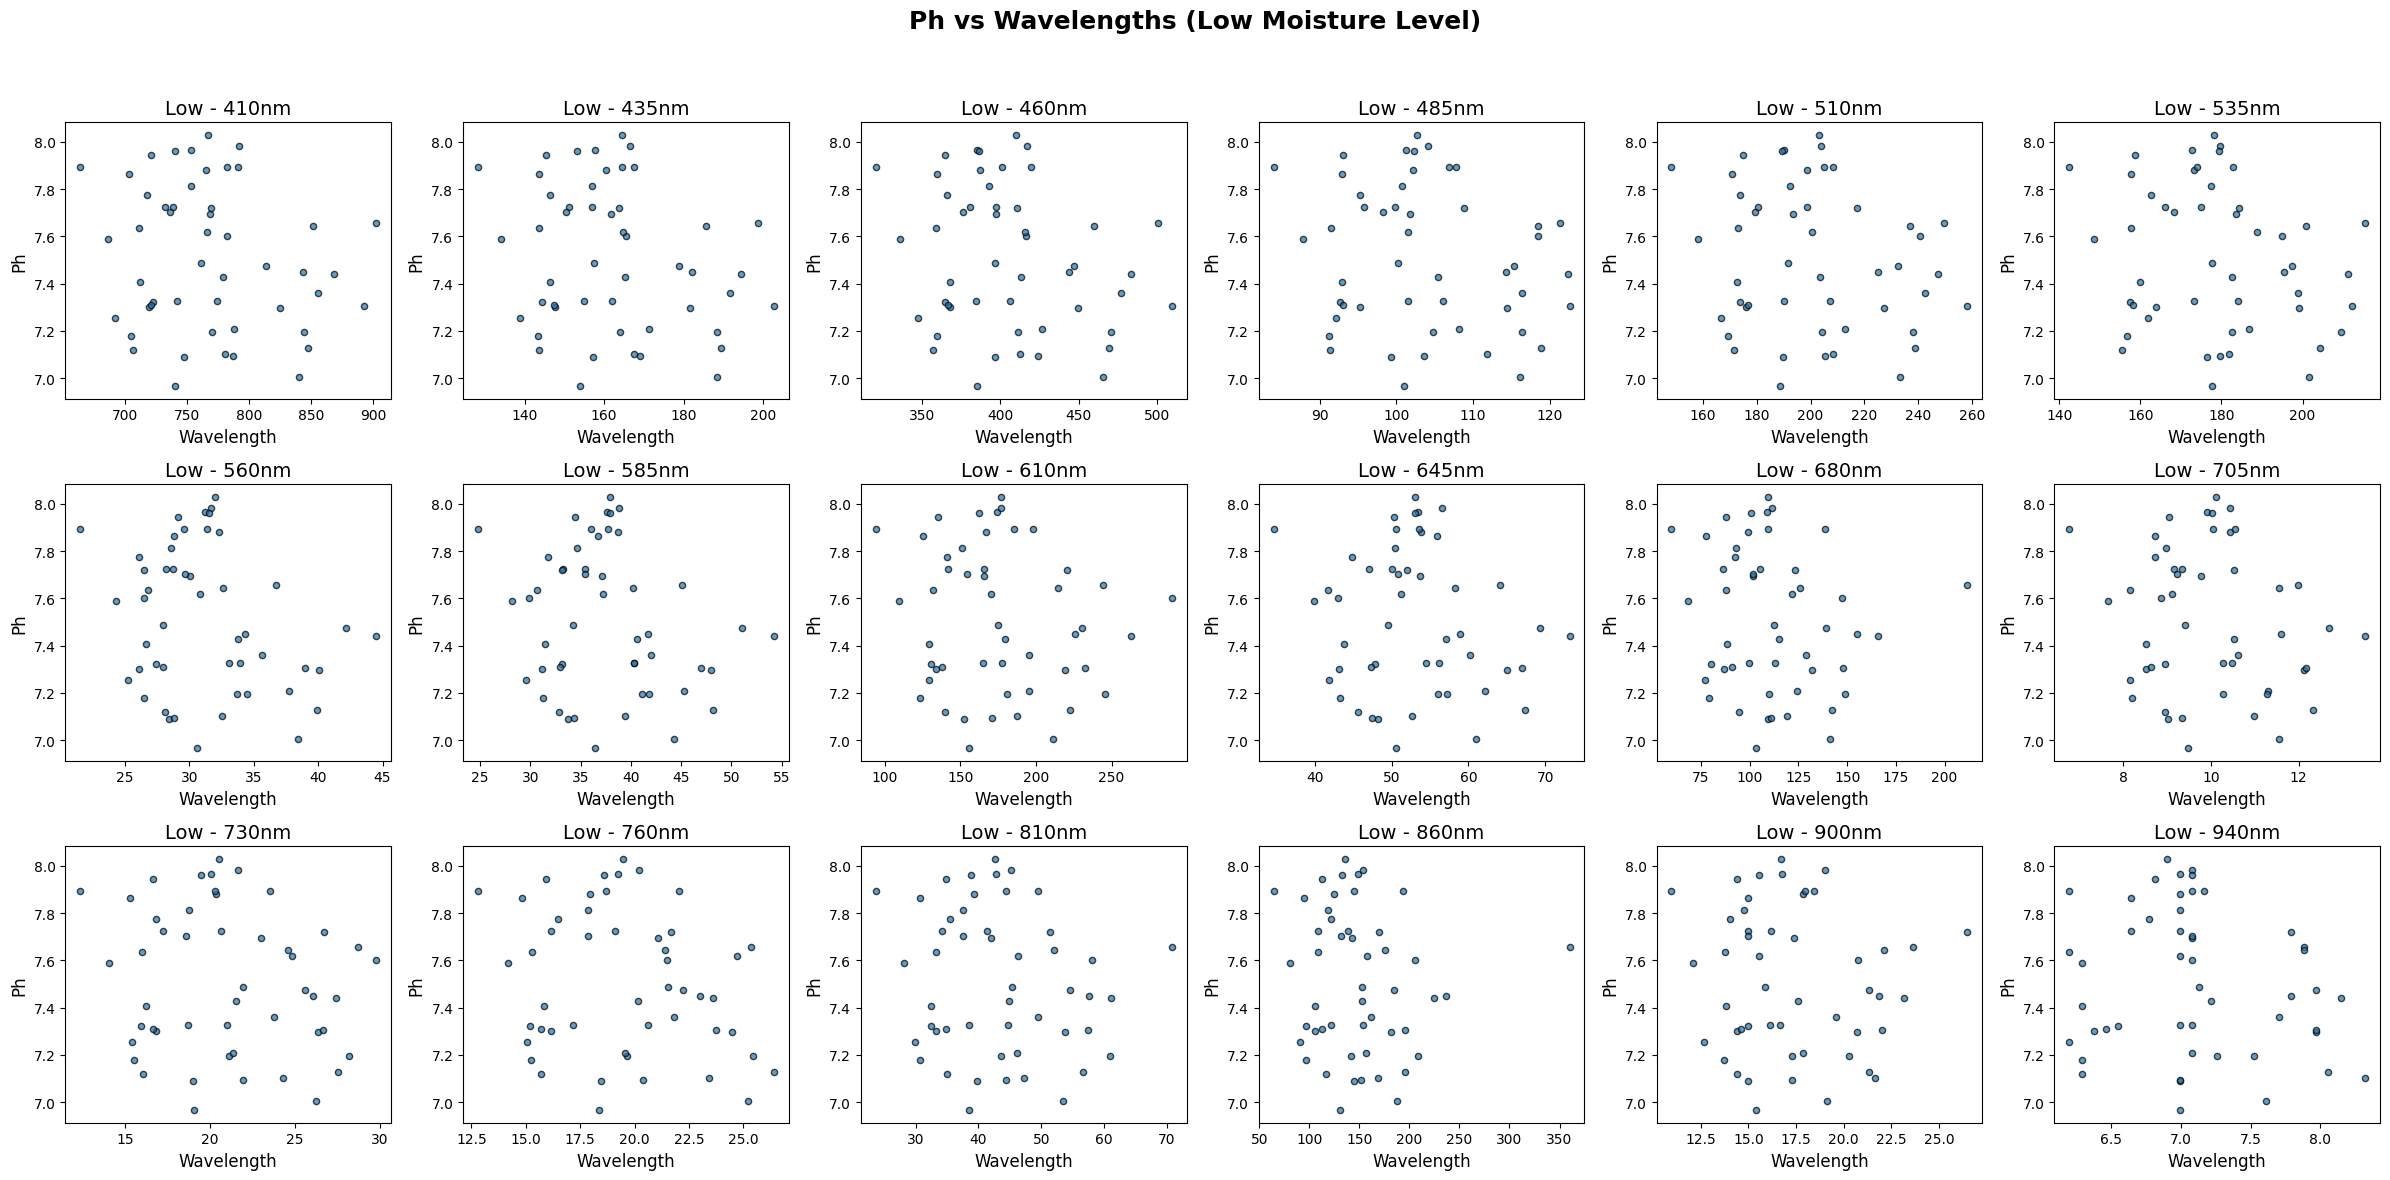

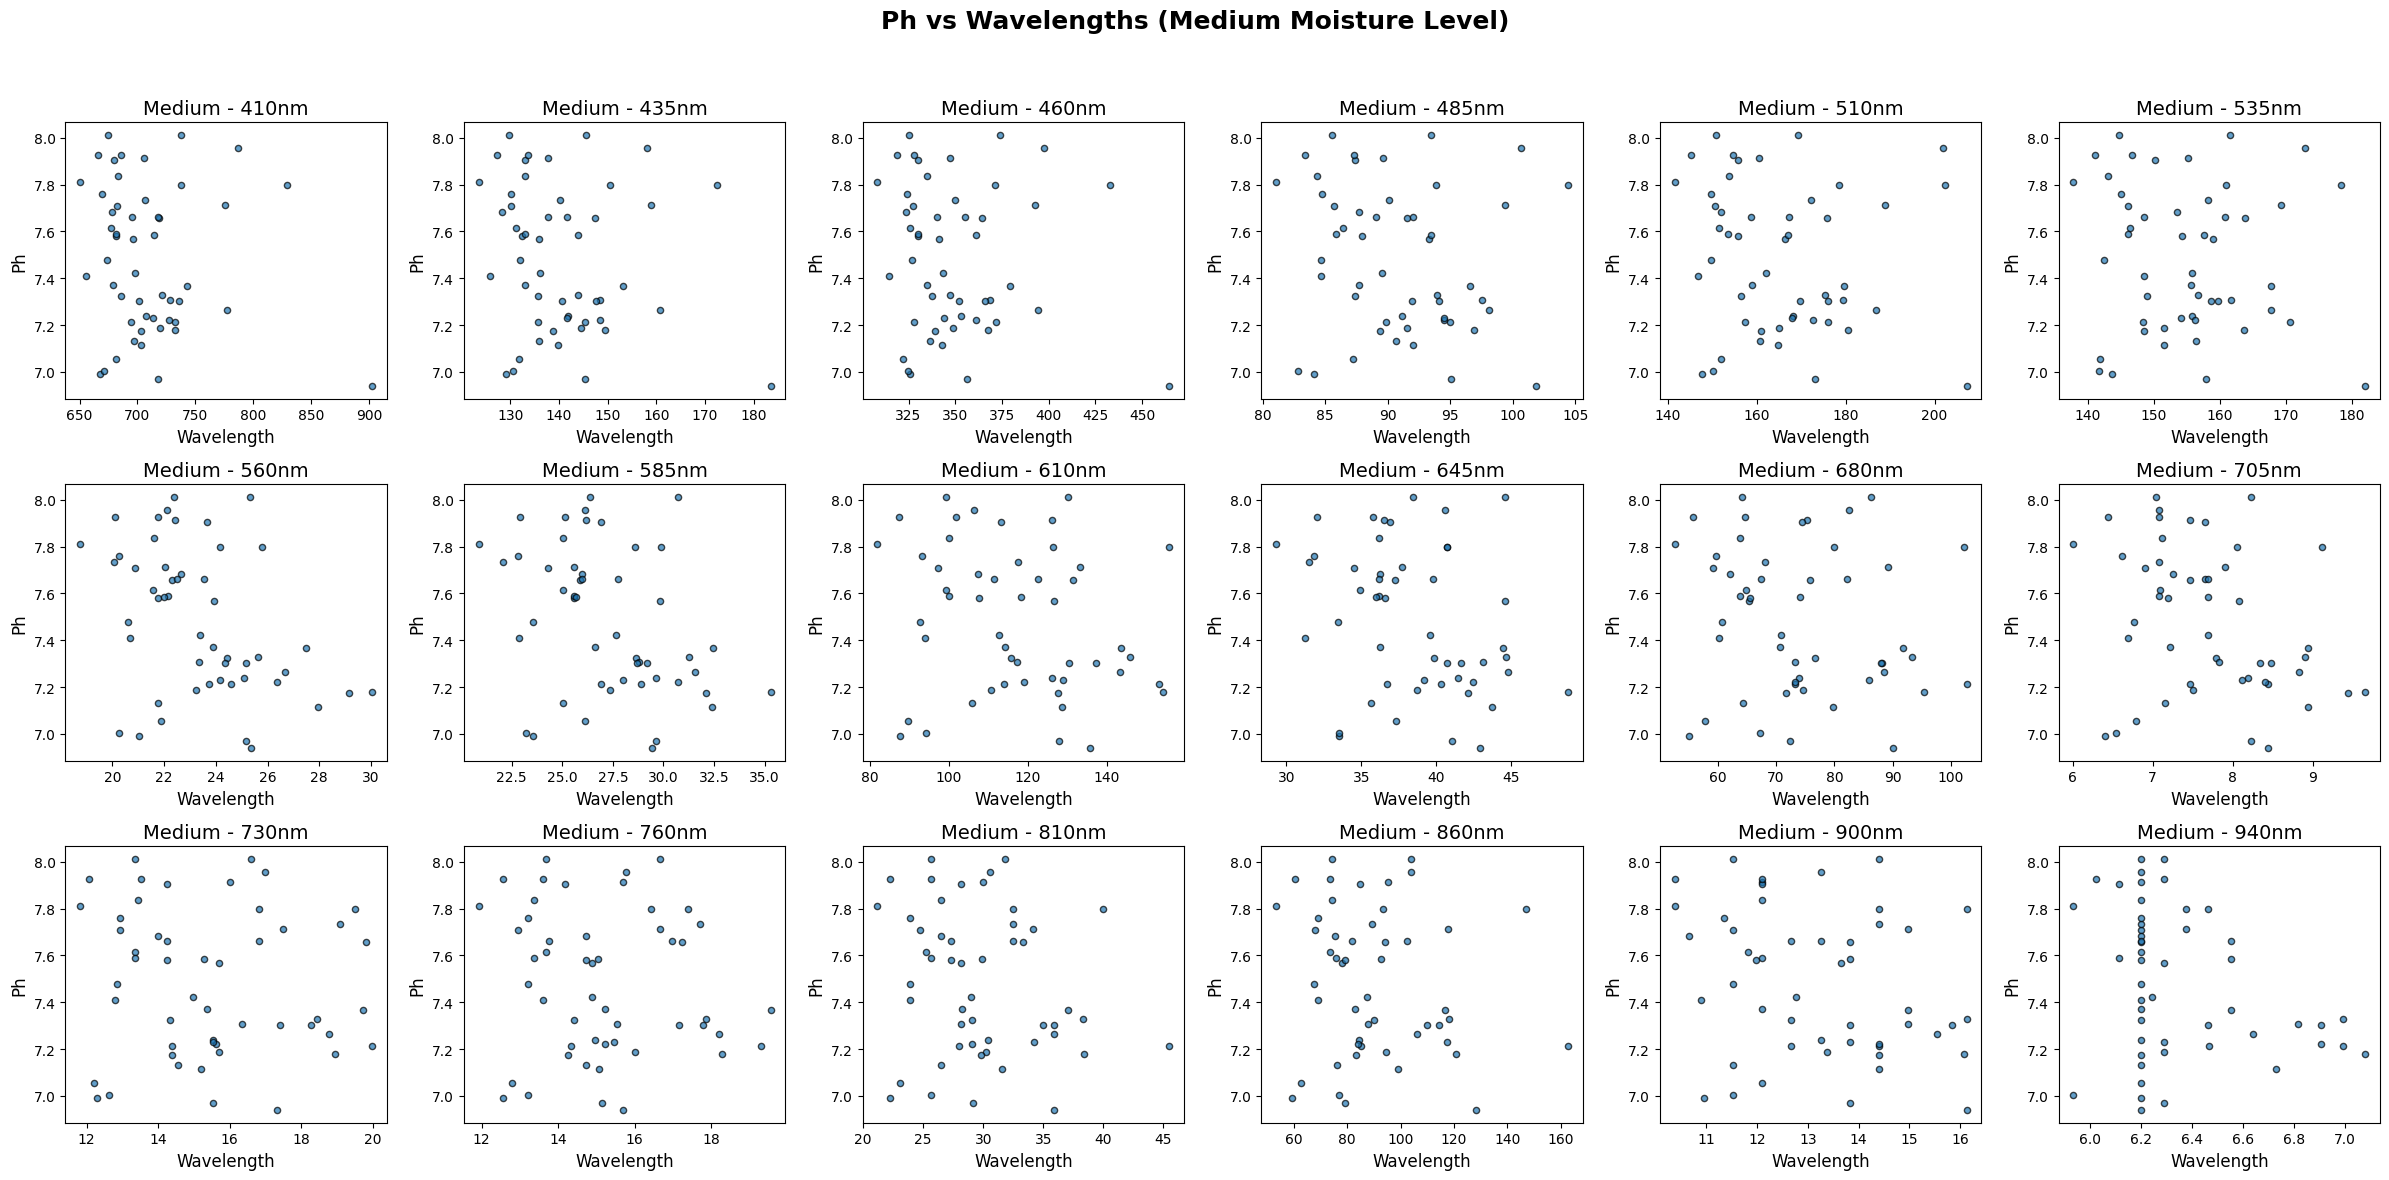

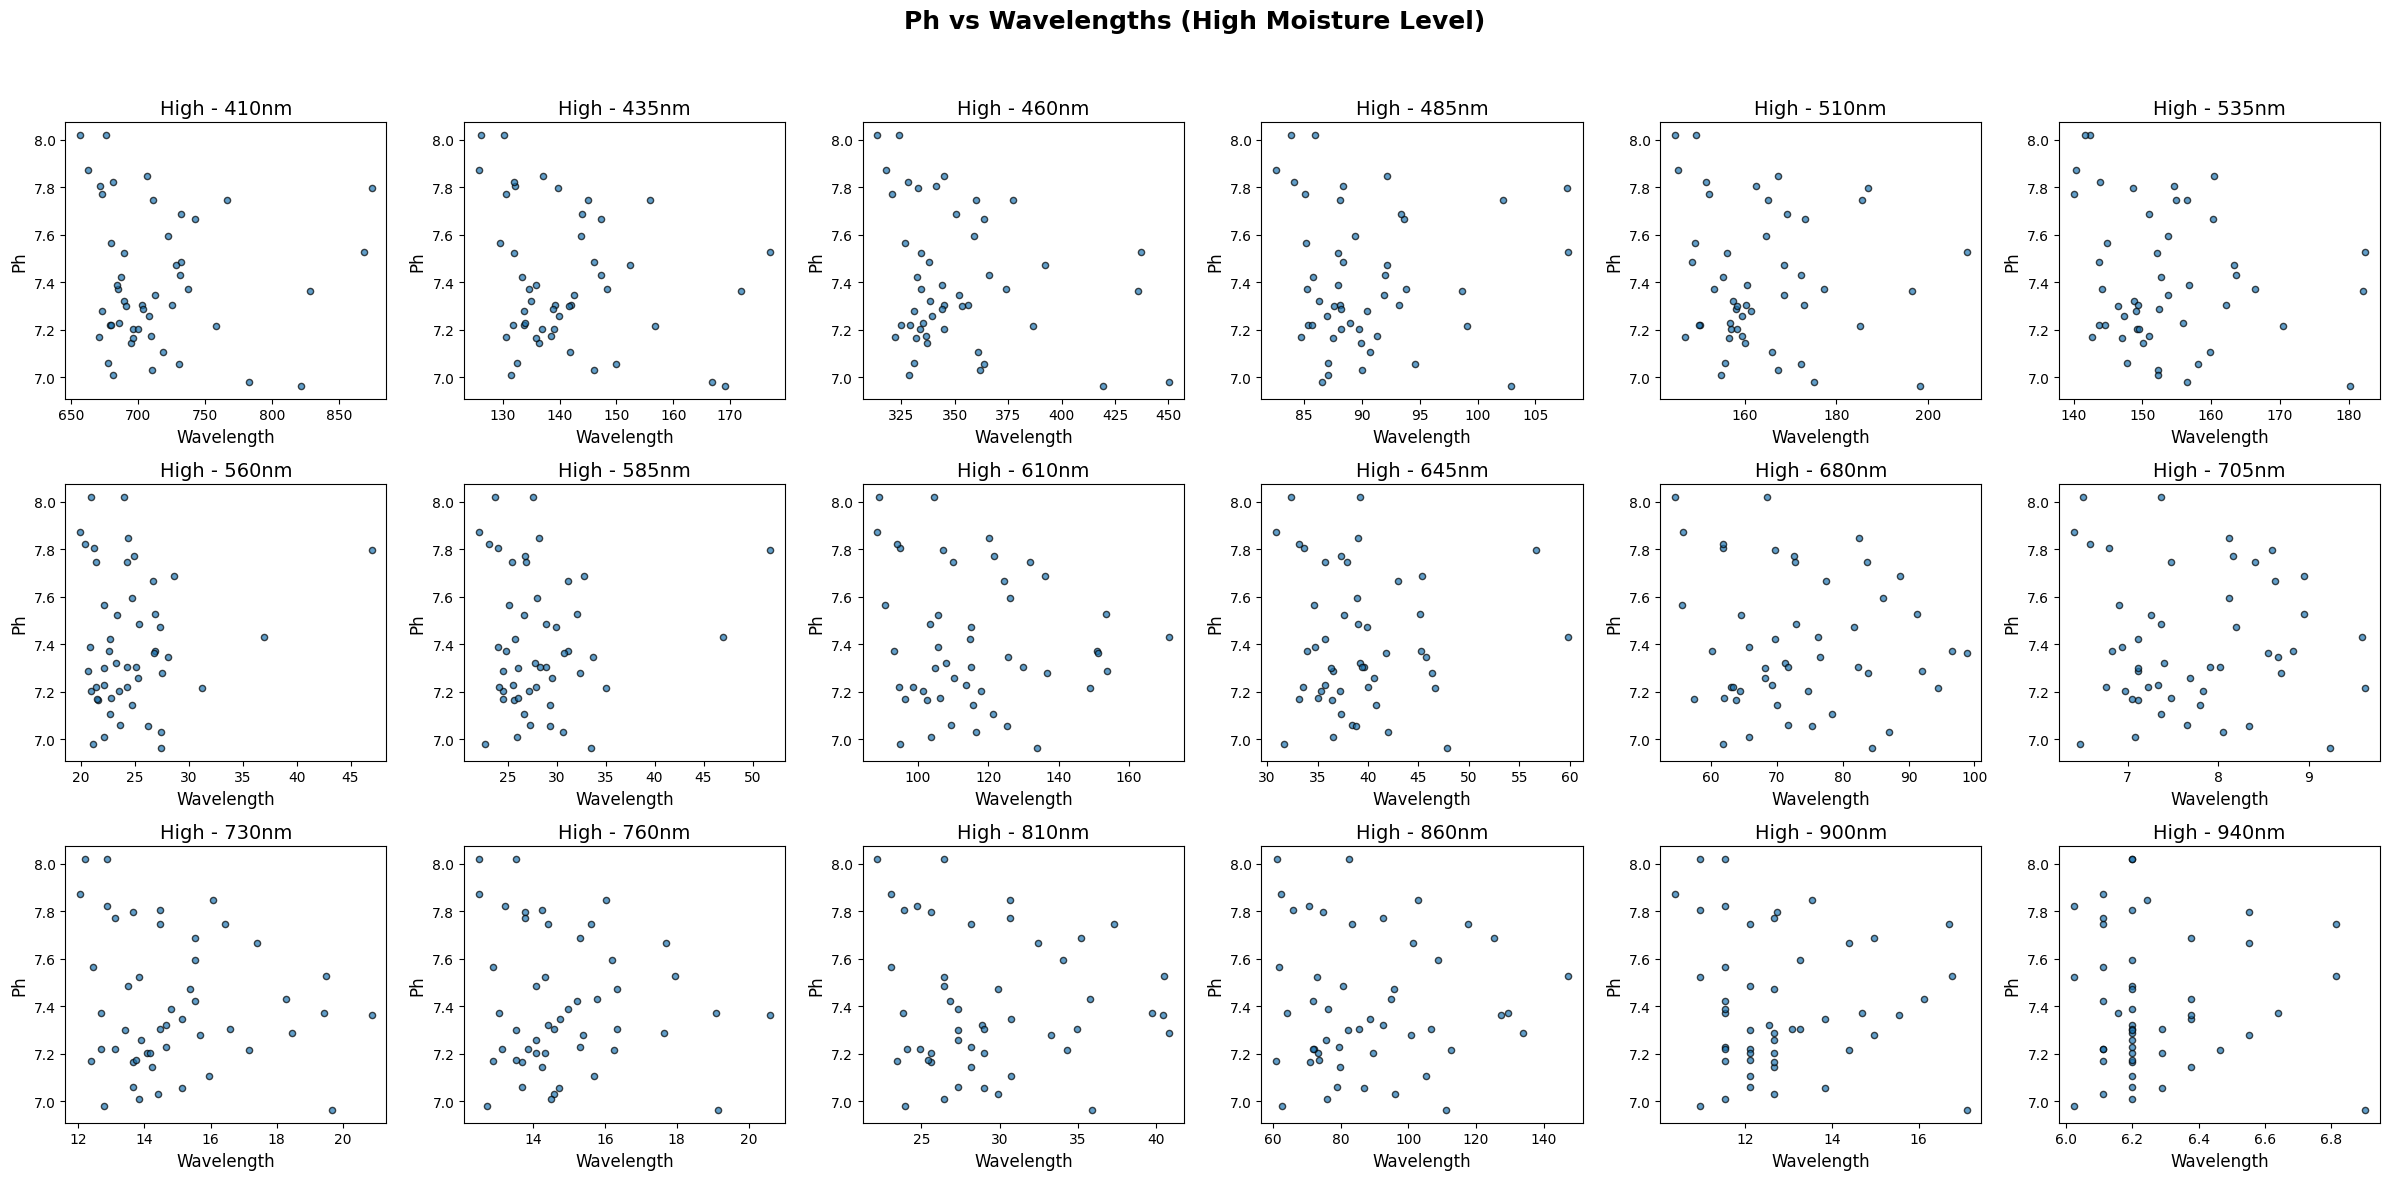

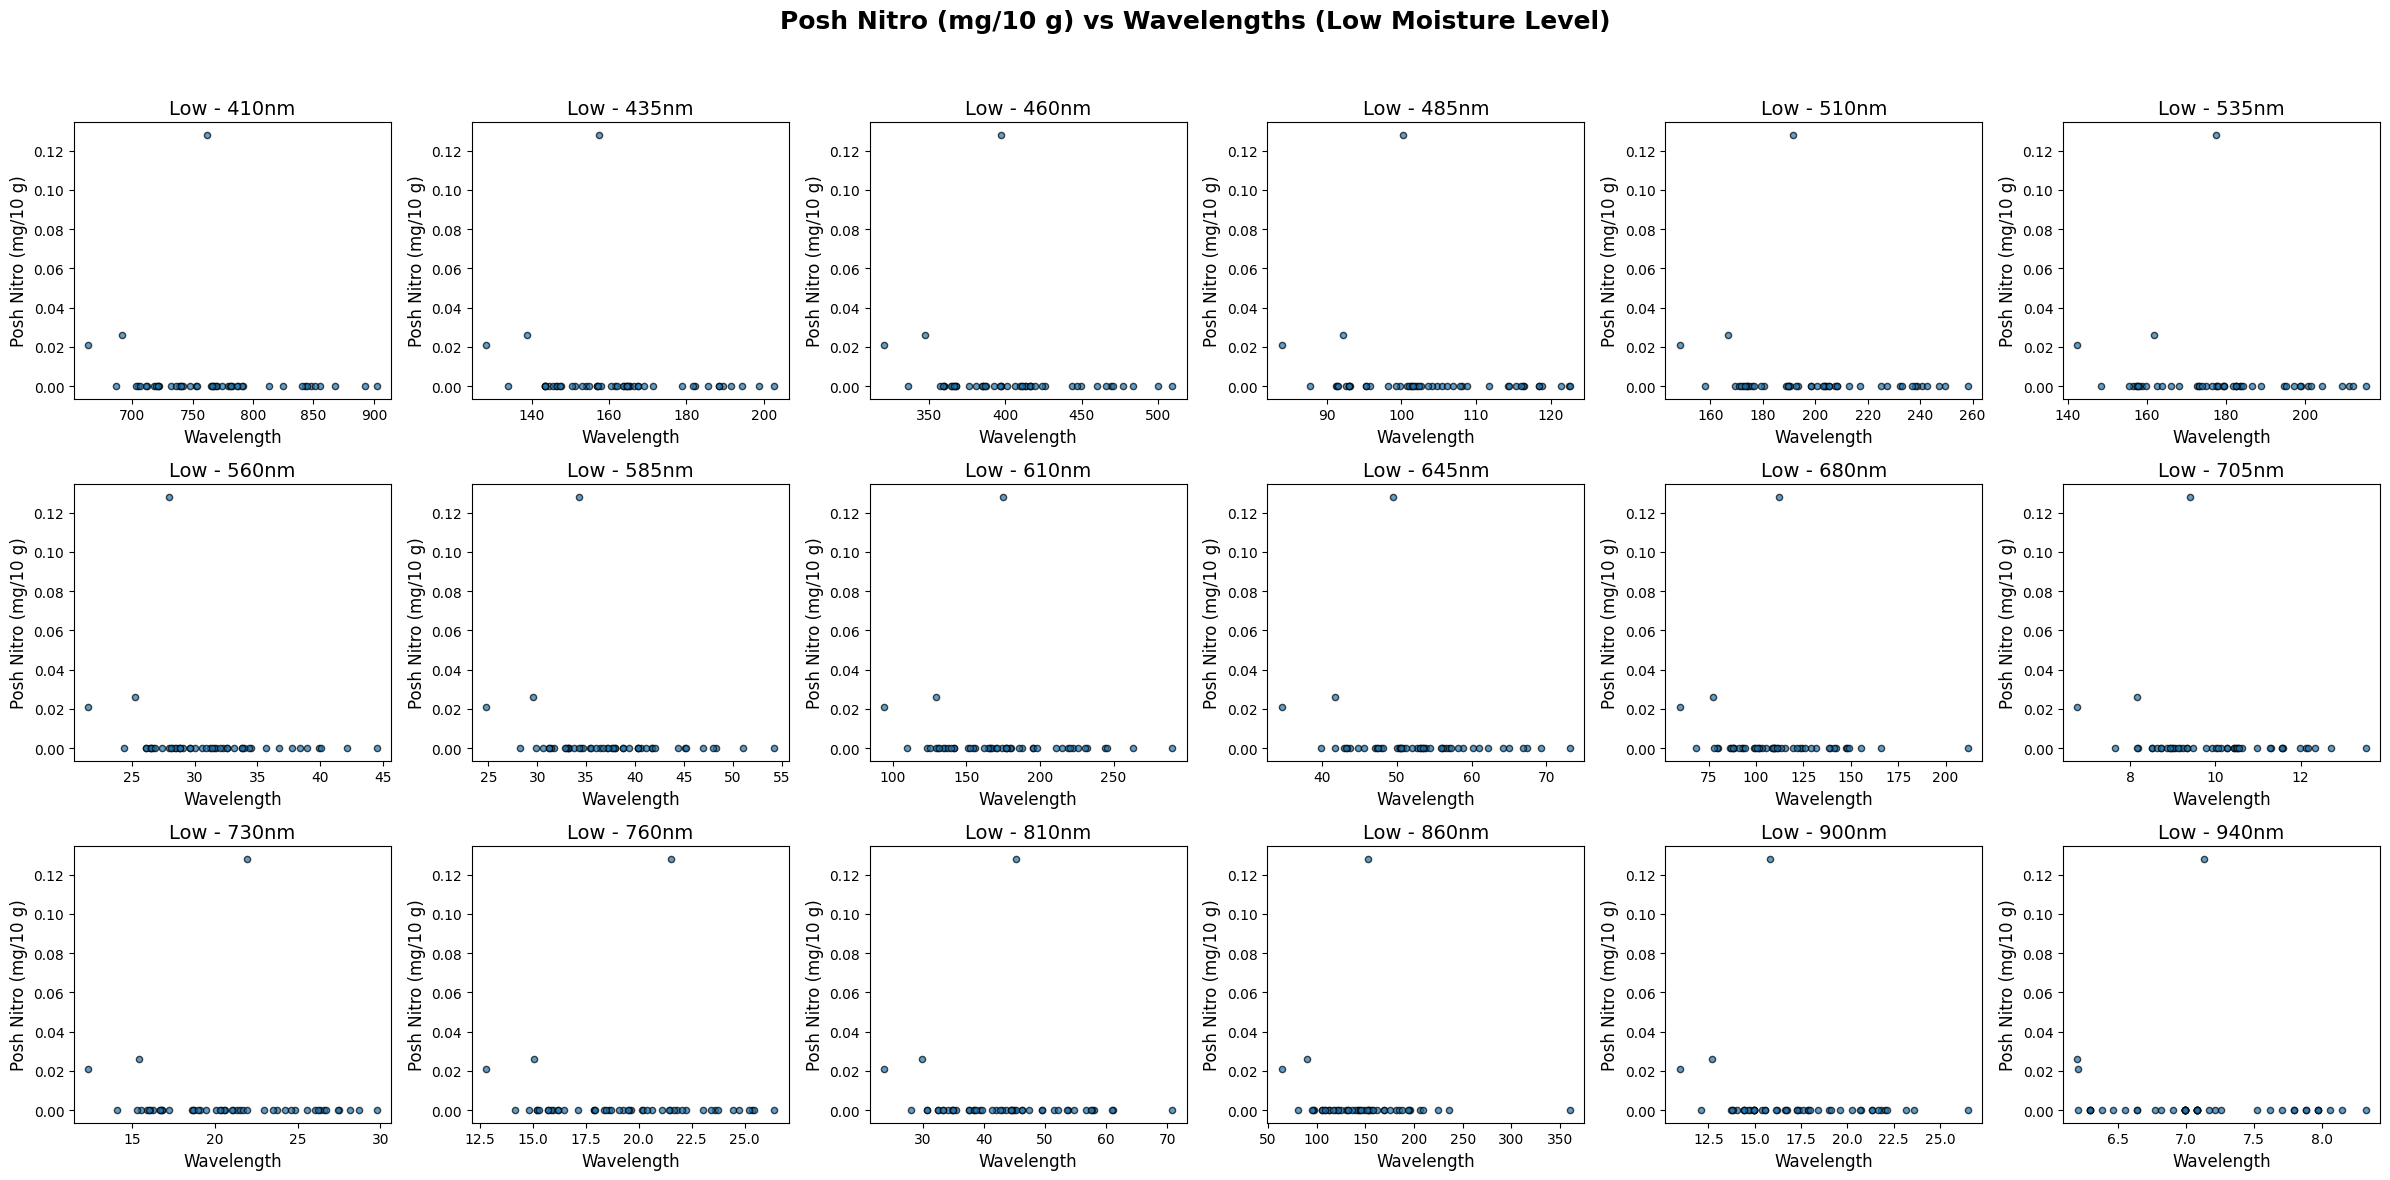

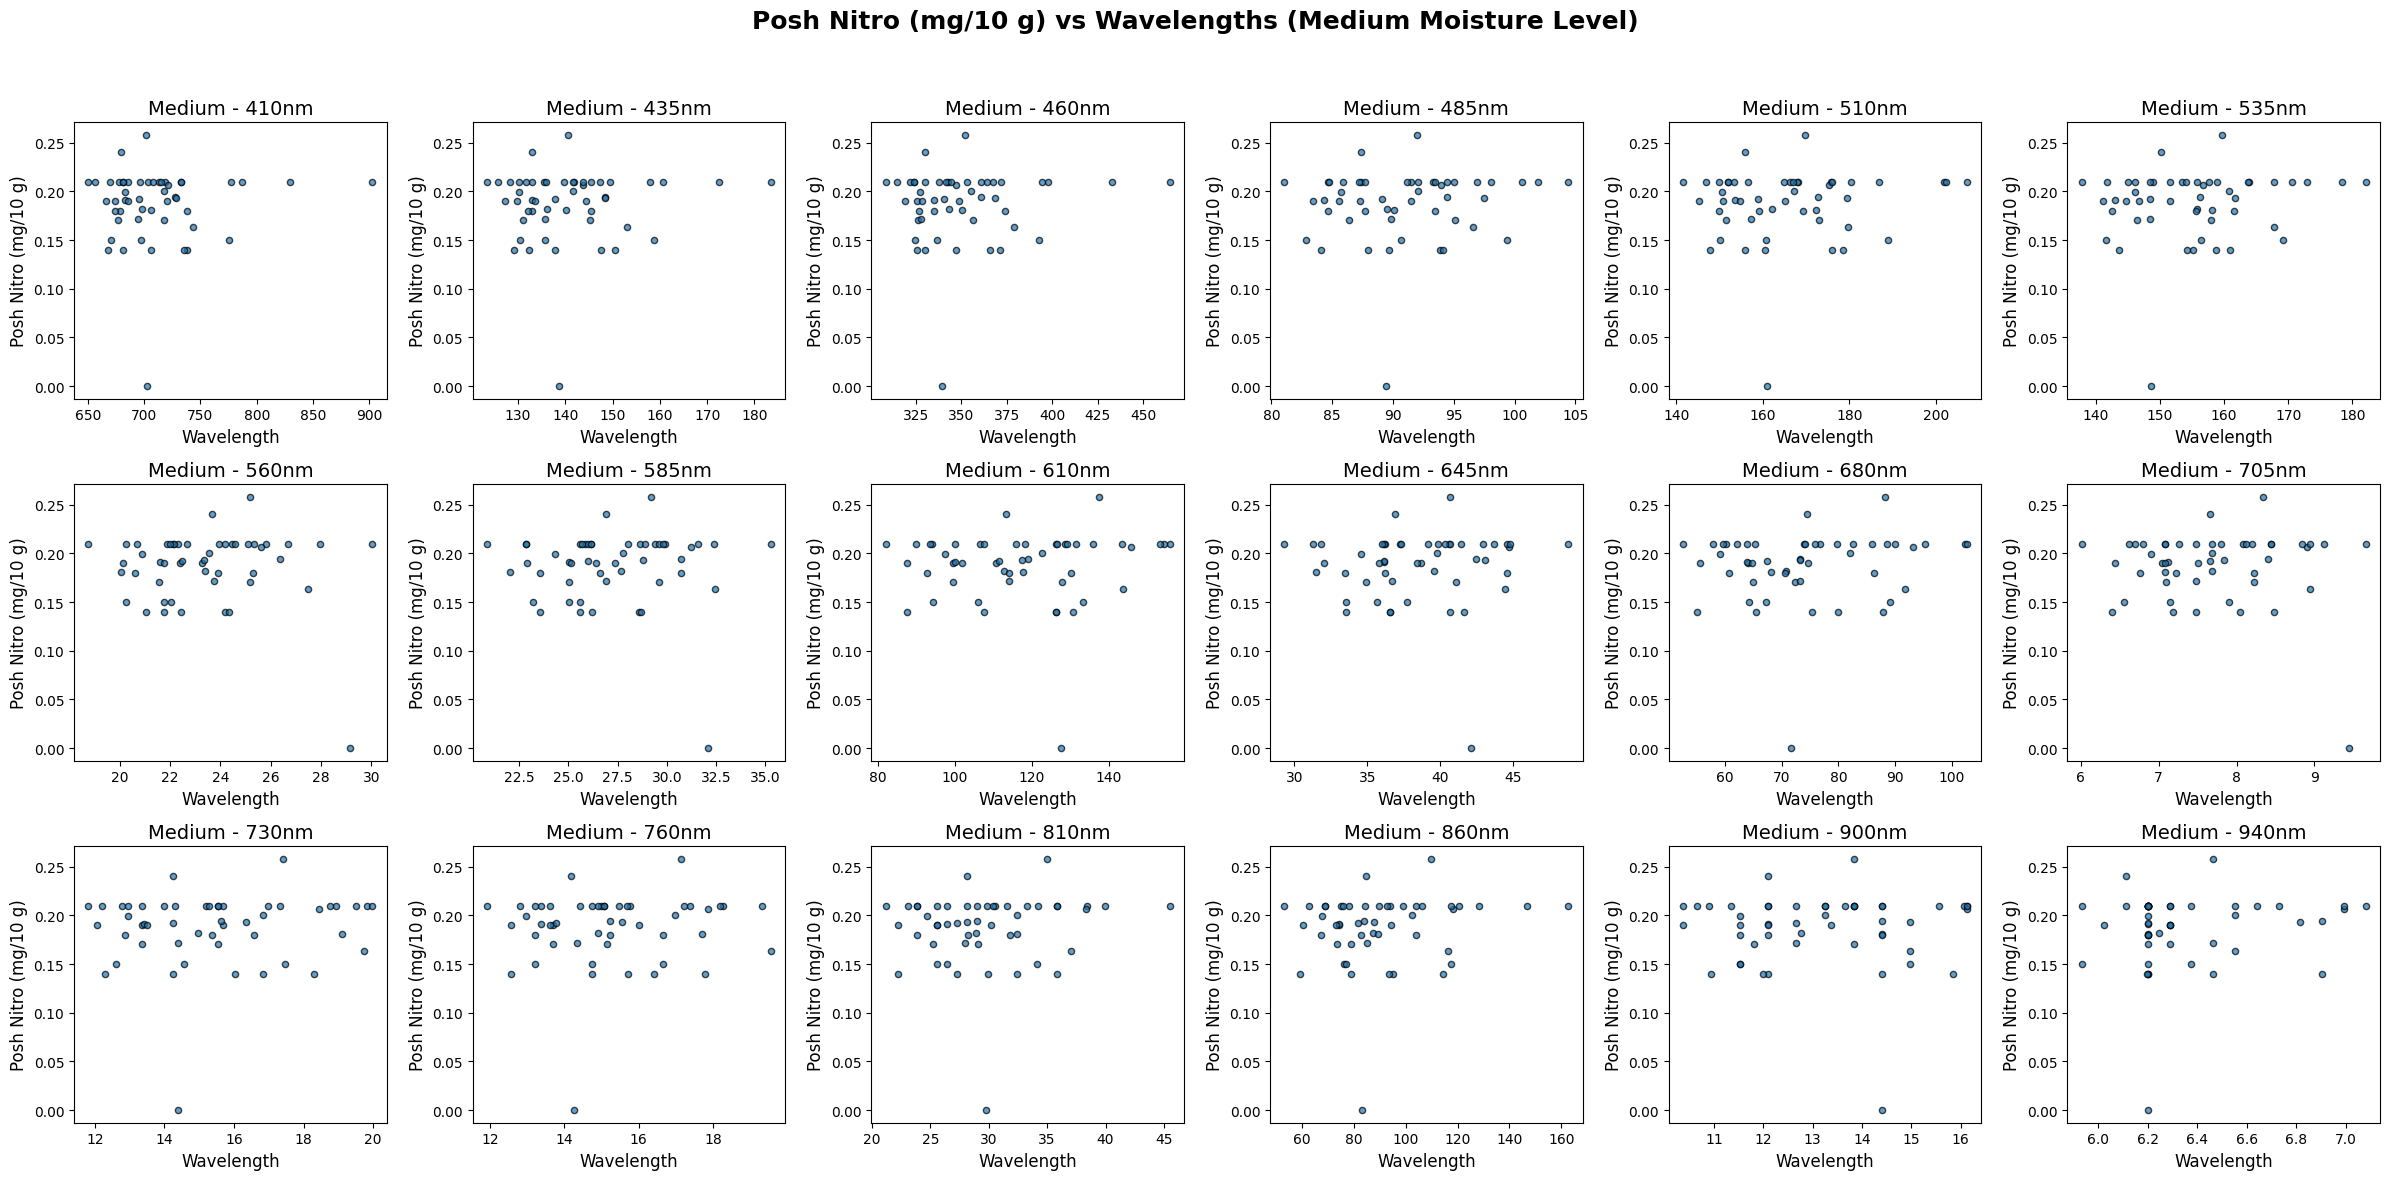

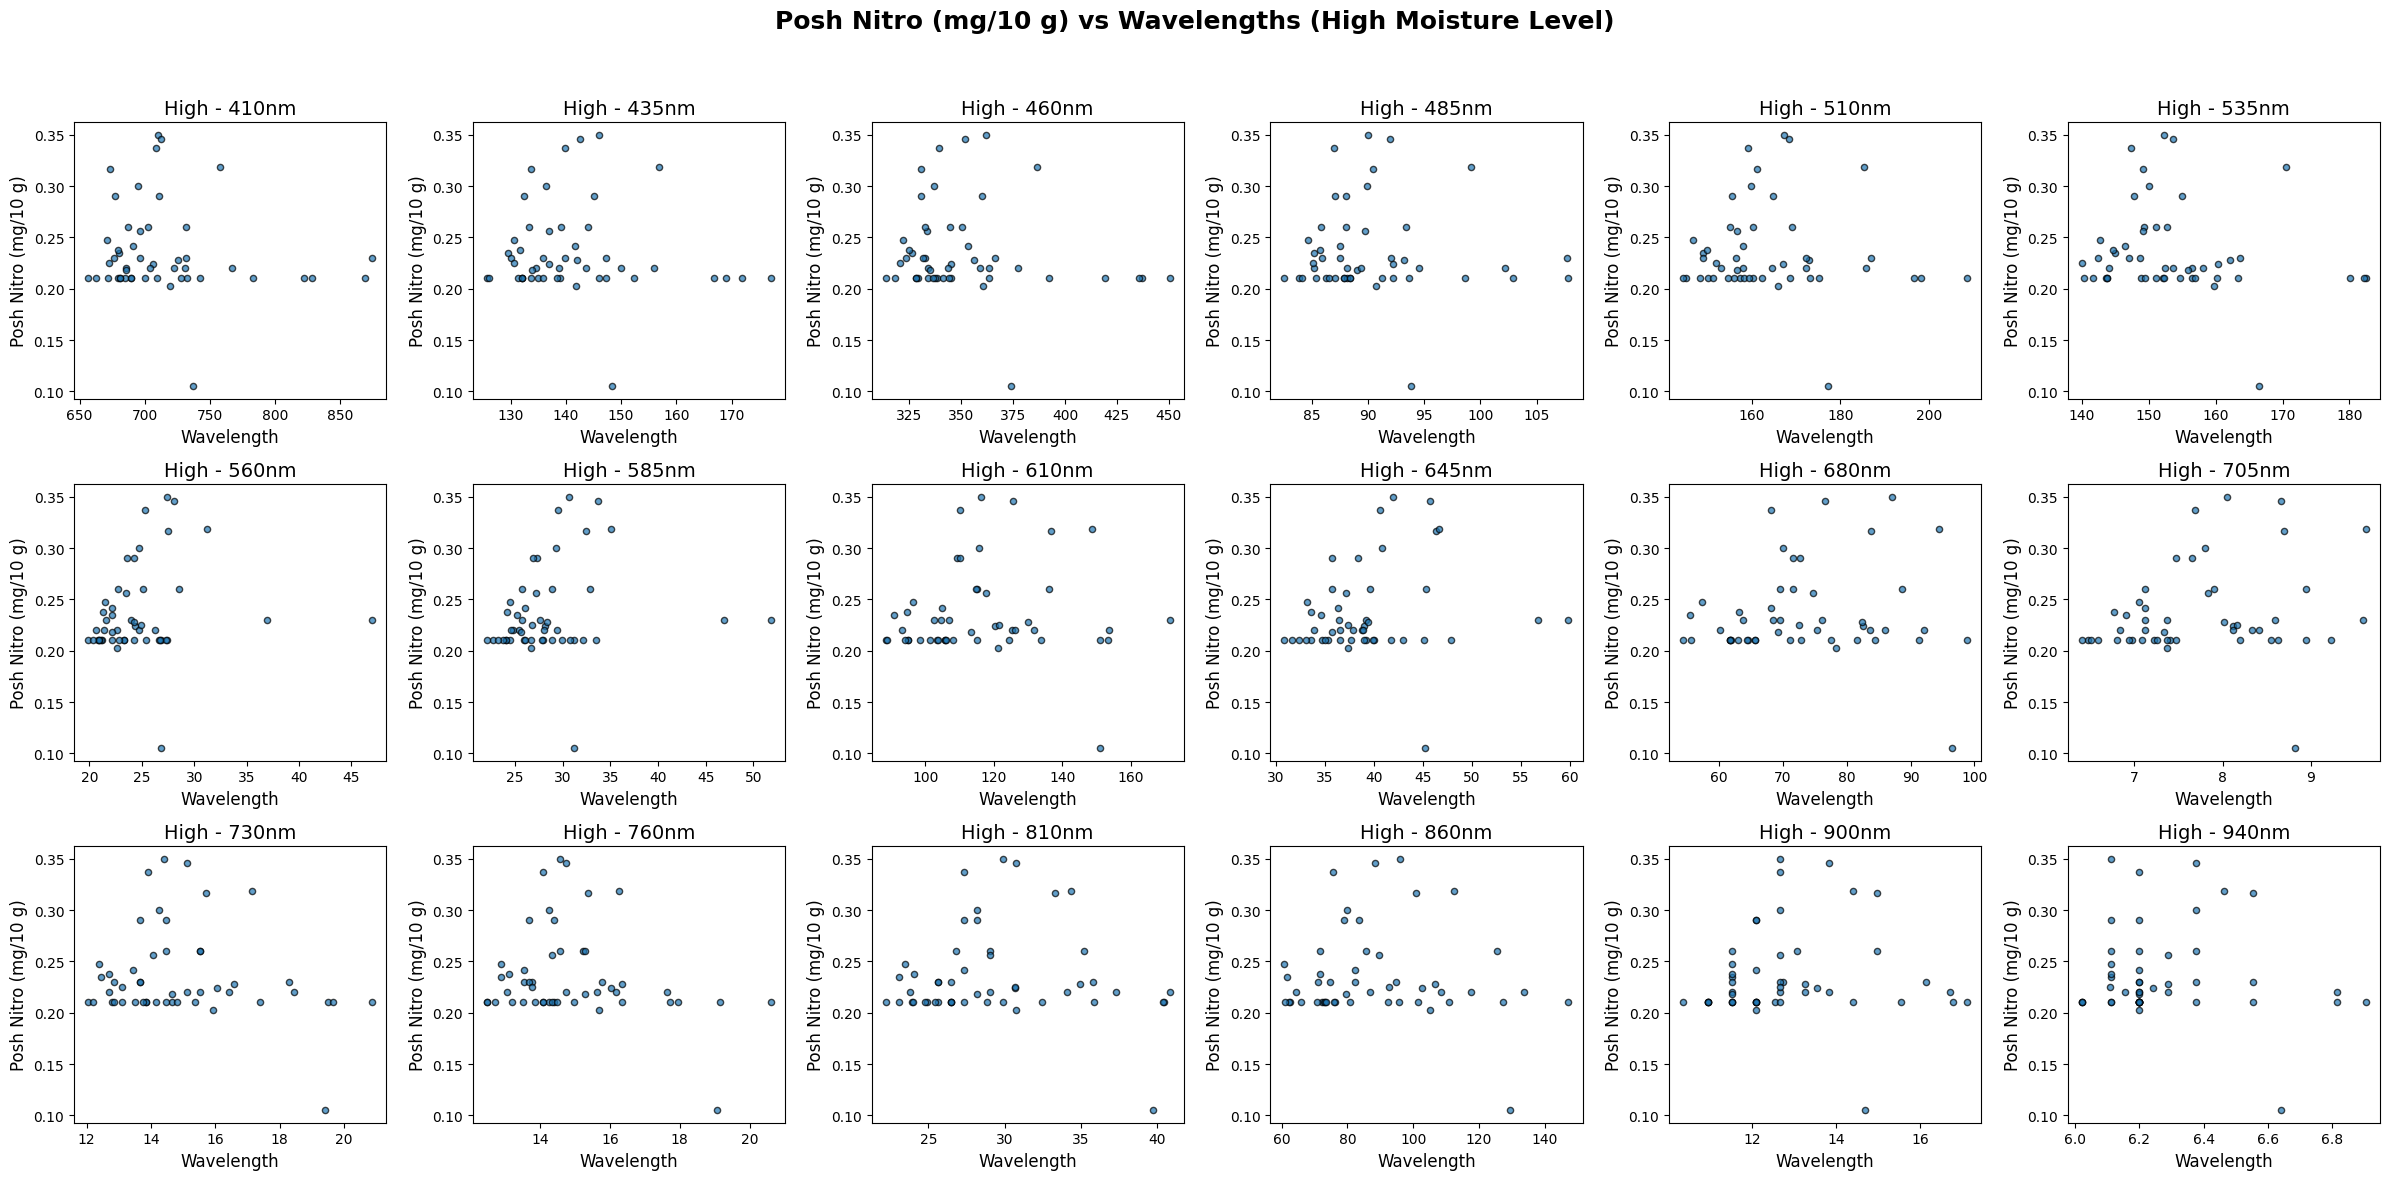

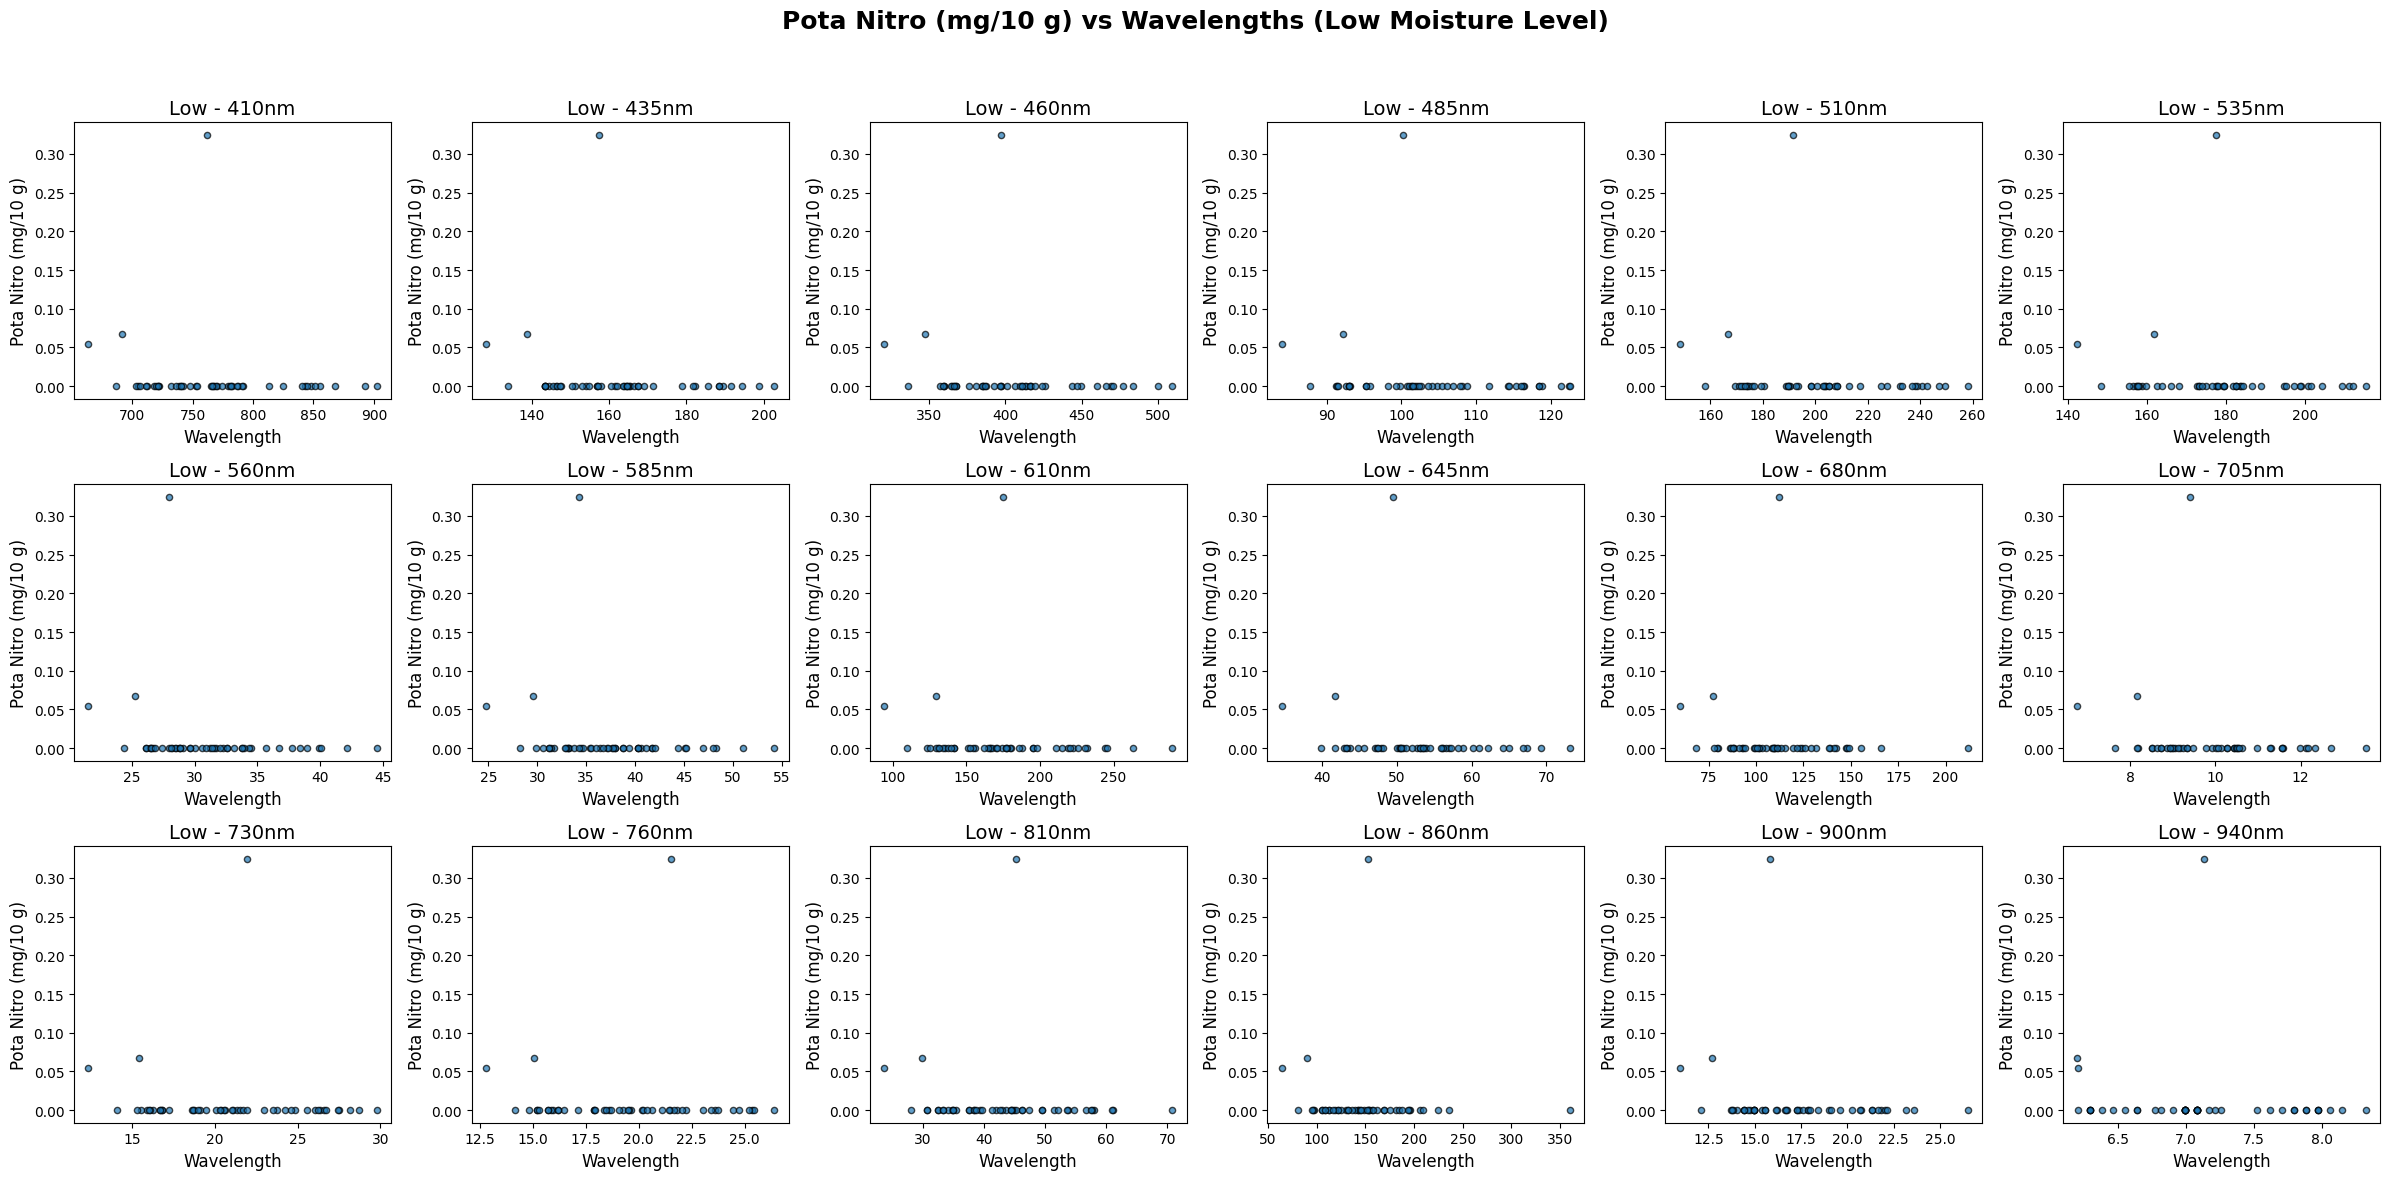

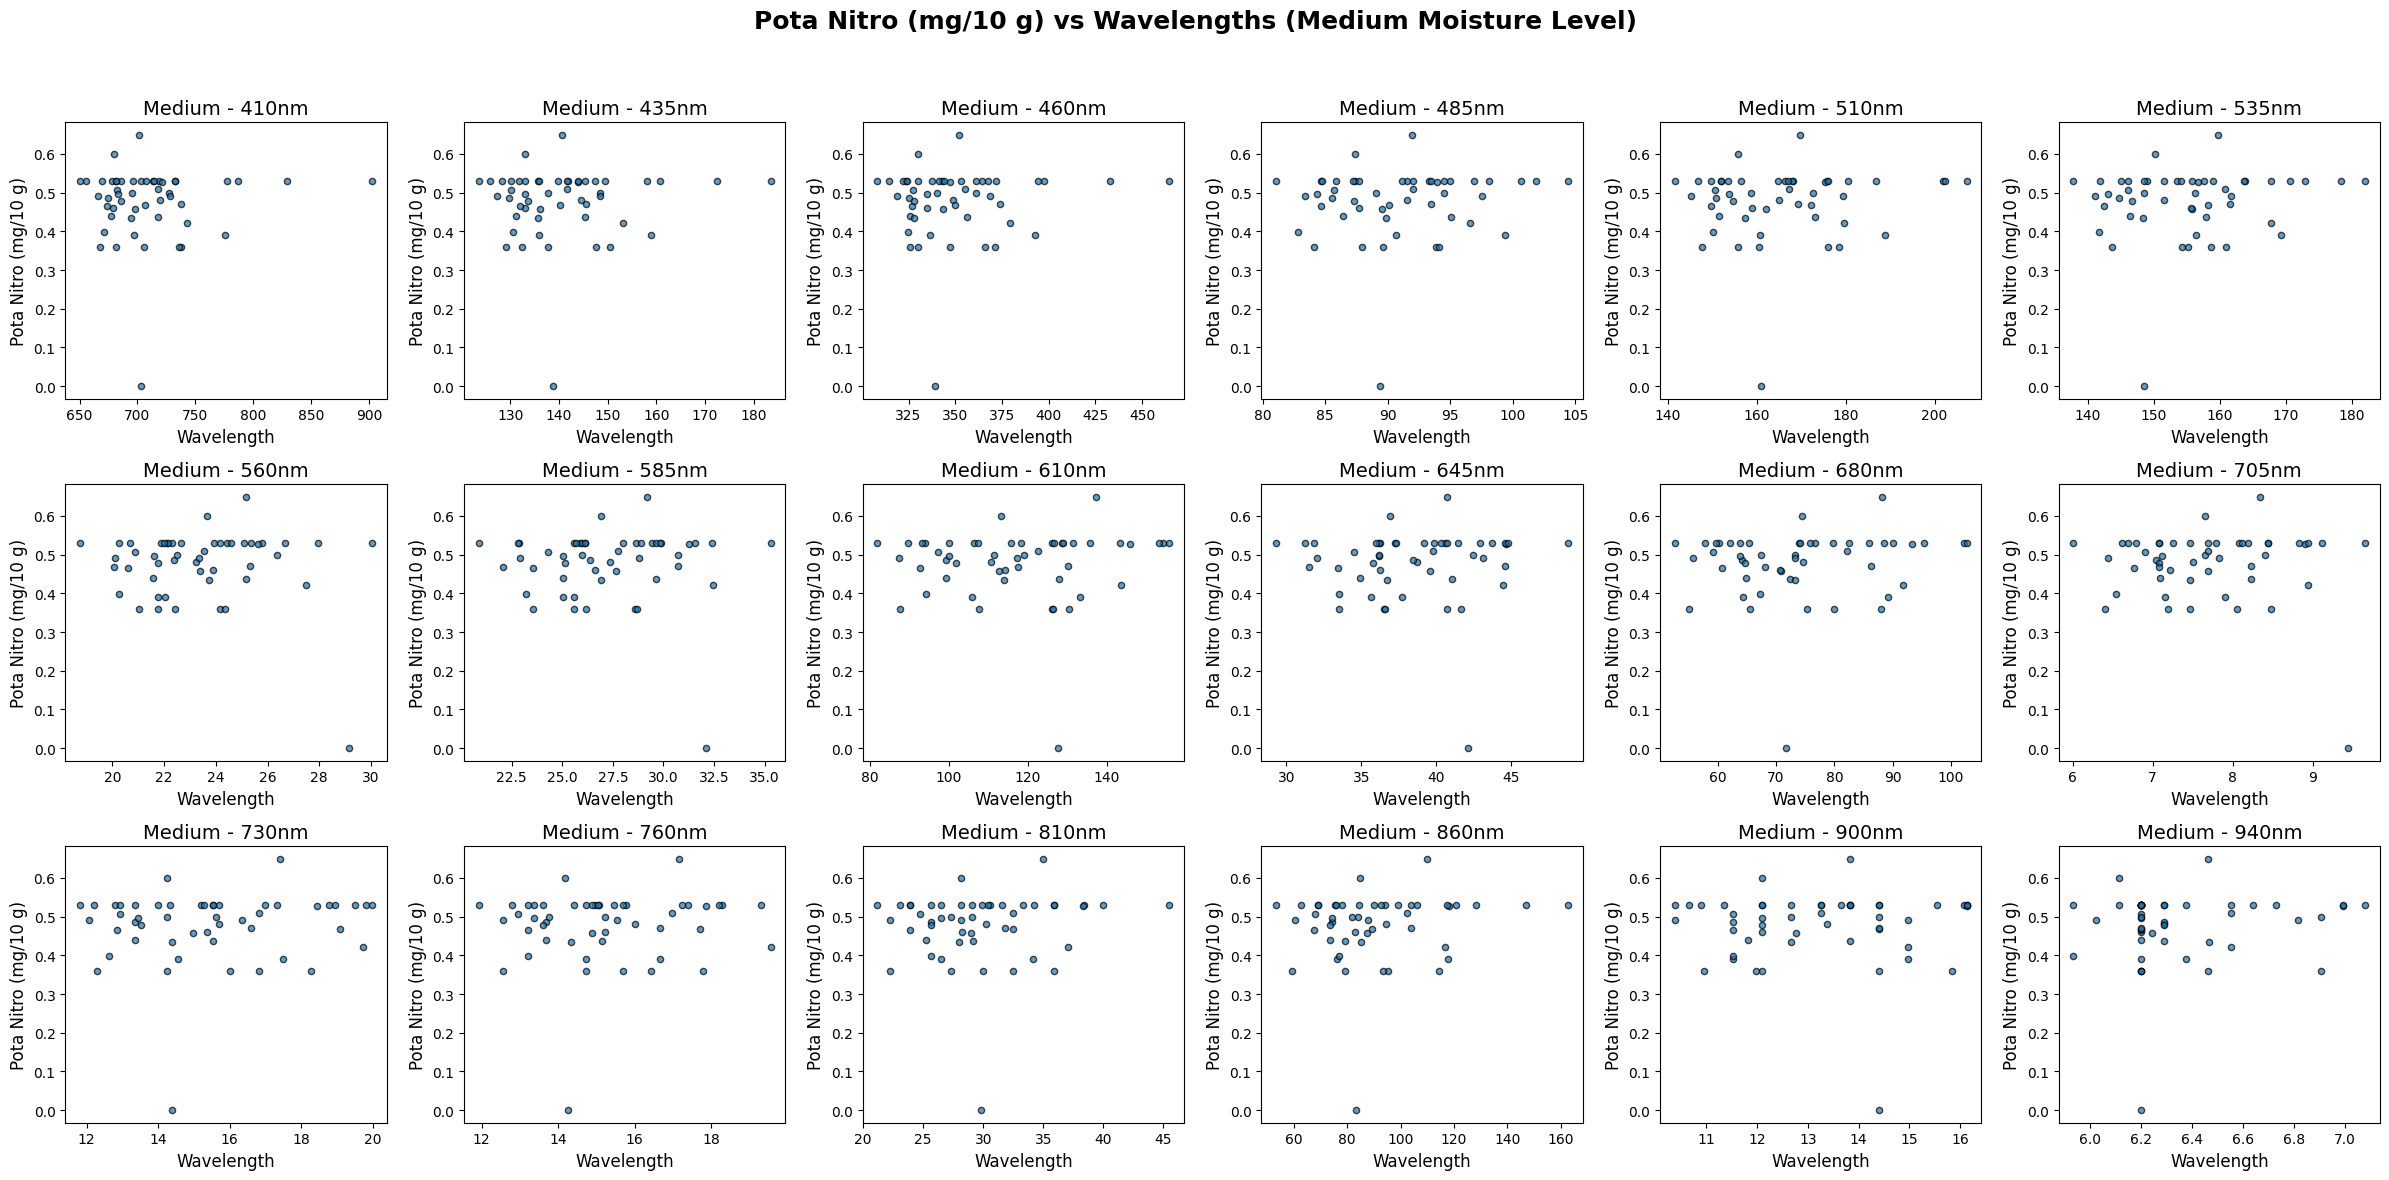

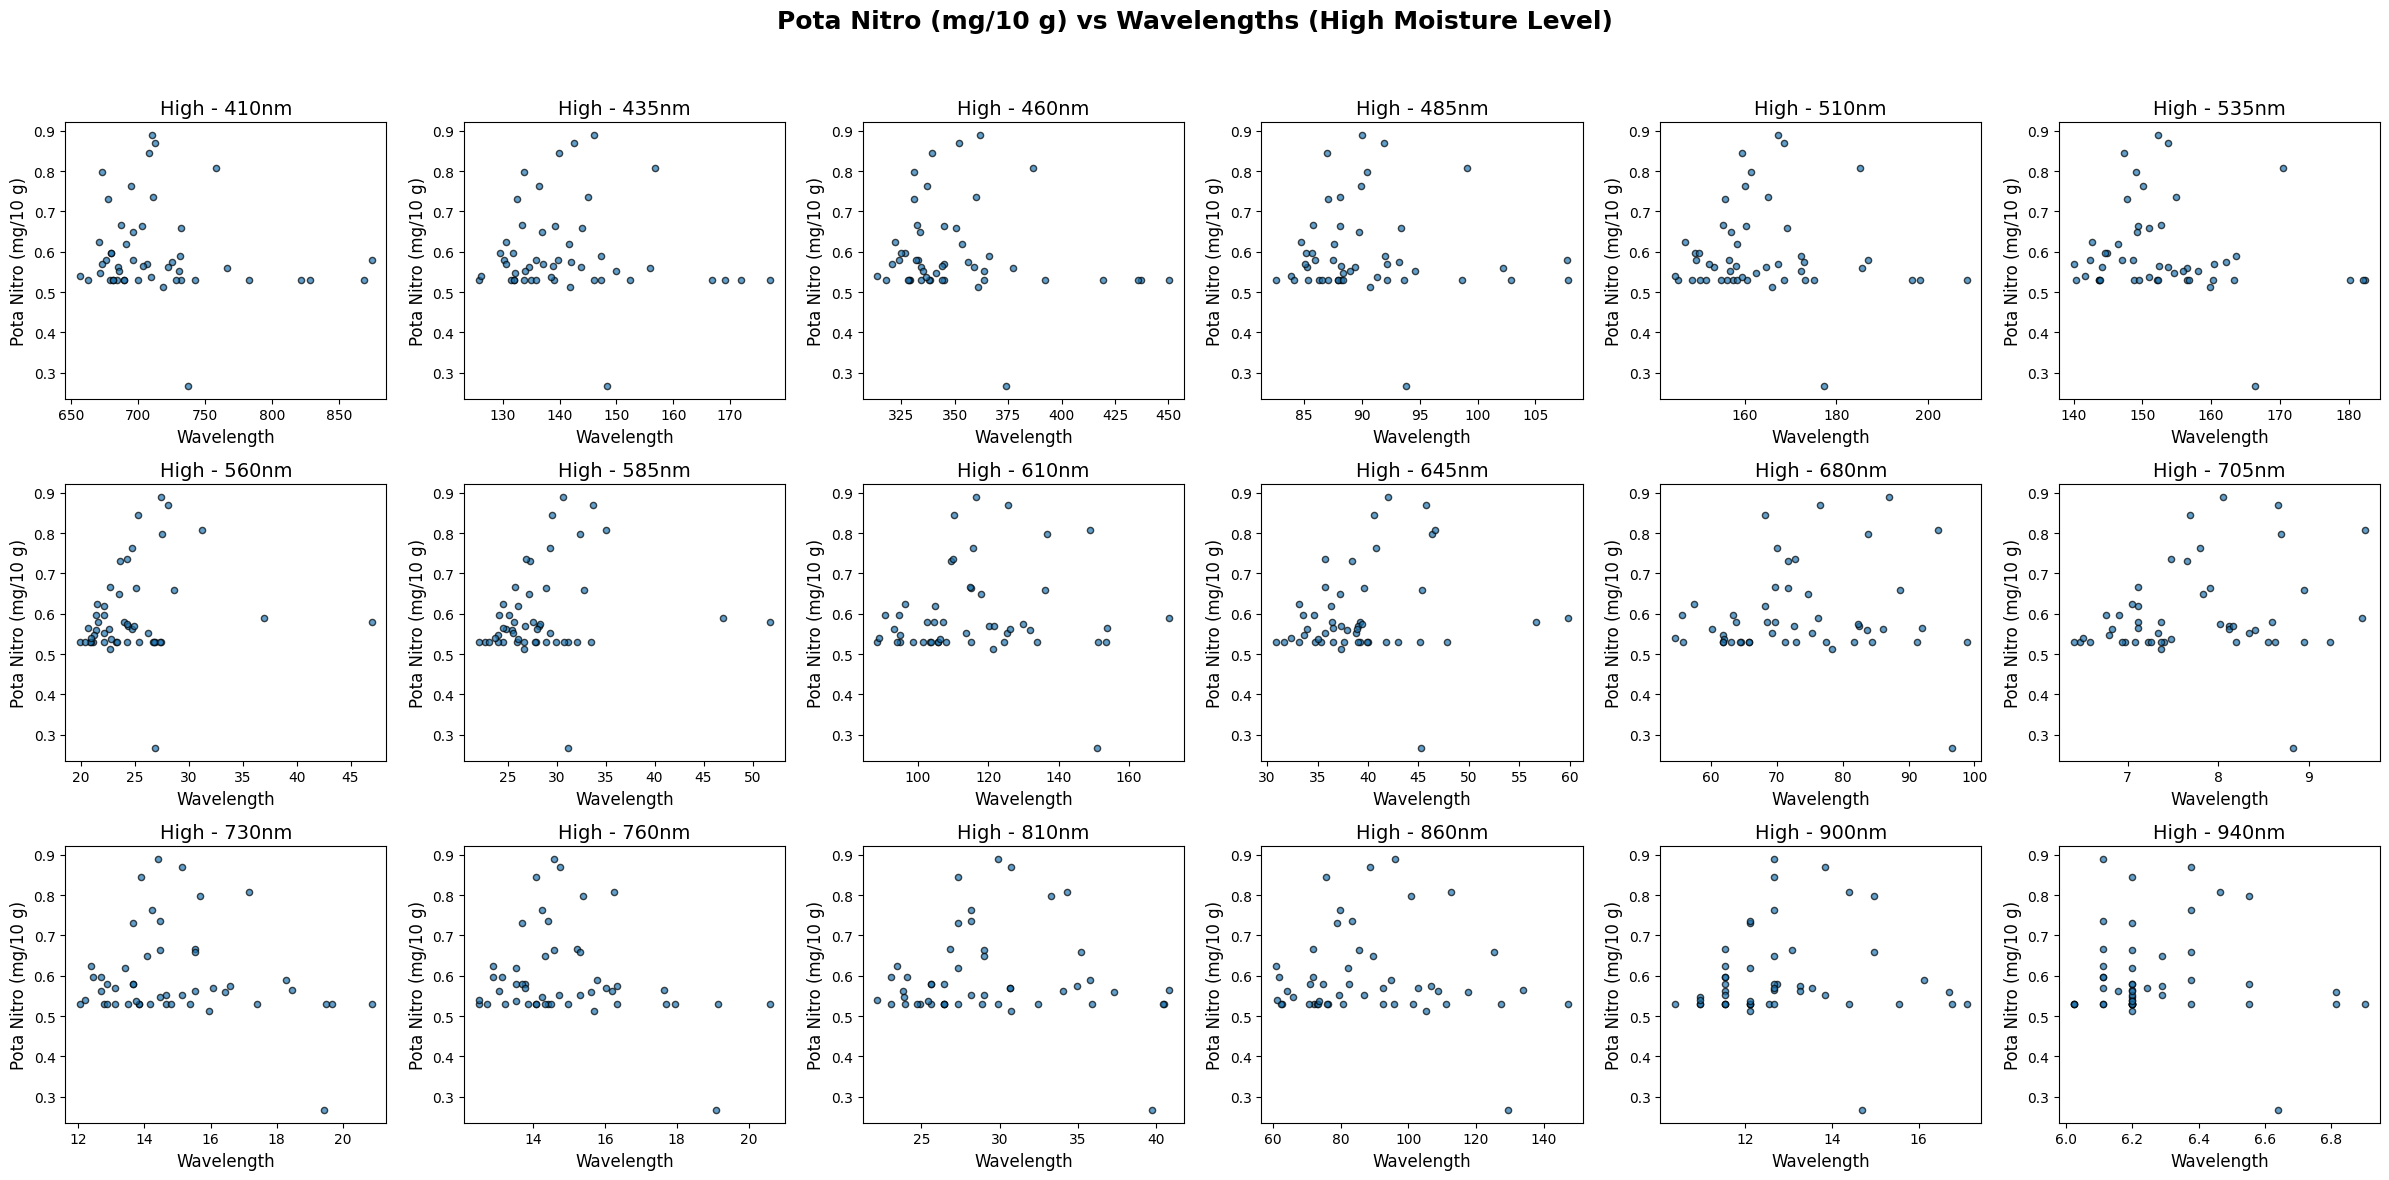

In [10]:
import matplotlib.pyplot as plt

# Function to plot Soil Property vs Wavelengths for each Moisture Level
def plot_property_vs_wavelengths(df, moisture_level, property_name):
    fig, axes = plt.subplots(3, 6, figsize=(24, 12))  # 3 rows, 6 columns
    
    for idx, wavelength in enumerate(wavelengths):
        row, col = divmod(idx, 6)  # Arrange in 3 rows & 6 columns
        ax = axes[row, col]
        
        ax.scatter(df[wavelength], df[property_name], alpha=0.7, edgecolors='k', s=20)
        ax.set_title(f"{moisture_level} - {wavelength}nm", fontsize=14)
        ax.set_xlabel("Wavelength", fontsize=12)
        ax.set_ylabel(property_name, fontsize=12)
    
    plt.suptitle(f"{property_name} vs Wavelengths ({moisture_level} Moisture Level)", fontsize=18, fontweight='bold')
    plt.tight_layout(rect=[0, 0, 1, 0.95])  
    plt.show()

# Define column names
wavelengths = ['410', '435', '460', '485', '510', '535', '560', '585', 
               '610', '645', '680', '705', '730', '760', '810', '860', '900', '940']
soil_properties = ['Ph', 'Posh Nitro (mg/10 g)', 'Pota Nitro (mg/10 g)']

# Plot for each soil property and each moisture level
for prop in soil_properties:
    plot_property_vs_wavelengths(df_low, "Low", prop)
    plot_property_vs_wavelengths(df_medium, "Medium", prop)
    plot_property_vs_wavelengths(df_high, "High", prop)
